## Customs Channel Data Analysis

This notebook presents an exploratory and preprocessing analysis of customs import declarations data, focusing on the “channel” variable, which represents inspection risk levels (Green, Yellow, Red, and Gray). The work includes data cleaning, handling of missing values, feature engineering, and statistical analysis of categorical and numerical features using metrics such as ANOVA F-score and Cramer’s V. The resulting dataset is enriched with risk-based and temporal features, laying the foundation for future predictive modeling and risk classification tasks.

### Table of Contents

1. [Initial Dataframe Analysis](#initial-dataframe-analysis)

2. [Dealing with Missing Values](#dealing-with-missing-values)

3. [Other Pre-processing Steps](#other-pre-processing-steps)  

4. [Feature Engineering](#feature-engineering)  

5. [Analyze Numeric Features](#analyze-numeric-features)

6. [Correlation Heatmap](#correlation-heatmap)  

7. [Target Variable Analysis](#target-variable-analysis)


### Initial Dataframe Analysis

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_parquet("data/sample_data.parquet")

In [3]:
# Display shape of the dataframe
df.shape

(100000, 14)

In [4]:
# Display first 50 rows of the dataframe
df.head(50)

,document_number,yearmonth,registry_date,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,consignee_name,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,channel
0,DI001000000,2023-10-01,2023-10-23,AEROPORTO DE VIRACOPOS,PORTO DE PARANAGUÁ,96582710910444,DEMAIS,DISTRIBUIDORA SILVA LTDA,BRASIL TERMINAL PORTUÁRIO LTDA,MARITIMA,85444200,DISTRIBUIDORA PEREIRA S/A,116.0,VERDE
1,DI001000001,2023-12-01,2023-12-15,PORTO DE ITAJAÍ,AEROPORTO DE BRASÍLIA,11076095431713,DEMAIS,DISTRIBUIDORA CARVALHO LTDA,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,MARITIMA,29362700,INTERNATIONAL LOPES IMP EXP LTDA,218.0,VERDE
2,DI001000002,2024-10-01,2024-10-08,AEROPORTO DE VIRACOPOS,AEROPORTO DE VIRACOPOS,89649666811829,DEMAIS,IMPORTADORA FERREIRA LTDA ME,AEROPORTOS BRASIL - VIRACOPOS S/A,MARITIMA,85171200,INTERNATIONAL LOPES LTDA ME,97.0,VERDE
3,DI001000003,2023-09-01,2023-09-19,PORTO DE SANTOS,PORTO DE SANTOS,71804559128933,DEMAIS,NACIONAL ALMEIDA S.A.,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,AEREA,85444200,NACIONAL PEREIRA LTDA,97.0,VERDE
4,DI001000004,2024-10-01,2024-10-16,PORTO DE ITAJAÍ,PORTO DE SUAPE,25639427881692,DEMAIS,TRADING MENDES LTDA,TCP - TERMINAL DE CONTEINERES DE PARANAGUA S/A,AEREA,29362600,COMERCIAL MONTEIRO EIRELI,169.0,VERDE
5,DI001000005,2023-03-01,2023-03-16,PORTO DE SANTOS,AEROPORTO DE VIRACOPOS,36748675675362,DEMAIS,TRADING OLIVEIRA COMERCIO LTDA,CONCESSIONÁRIA DO AEROPORTO INTERNACIONAL DE G...,MARITIMA,87060010,GLOBAL SANTOS EIRELI,246.0,VERDE
6,DI001000006,2024-08-01,2024-08-07,AEROPORTO DE BRASÍLIA,AEROPORTO DE VIRACOPOS,15952859947558,DEMAIS,CONTINENTAL MONTEIRO INDUSTRIA LTDA,CONCESSIONÁRIA DO AEROPORTO INTERNACIONAL DE G...,MARITIMA,73182900,BRASIL VIEIRA IMP EXP LTDA,756.0,VERDE
7,DI001000007,2024-10-01,2024-10-03,PORTO DE SUAPE,PORTO DE PARANAGUÁ,57795001732538,DEMAIS,NACIONAL SANTOS LTDA,CONCESSIONÁRIA DO AEROPORTO INTERNACIONAL DE G...,AEREA,30049099,LOGÍSTICA SOARES S/A,372.0,VERDE
8,DI001000008,2023-05-01,2023-05-11,PORTO DE SANTOS,AEROPORTO DE CONGONHAS,28745271936700,DEMAIS,BRASIL ALMEIDA IMP EXP LTDA,LIBRA TERMINAIS SANTOS S/A,RODOVIARIA,87060010,DISTRIBUIDORA MENDES COMERCIO LTDA,169.0,VERDE
9,DI001000009,2023-11-01,2023-11-14,AEROPORTO DE CONGONHAS,PORTO DE SALVADOR,84219933083353,DEMAIS,COMERCIAL RODRIGUES INDUSTRIA LTDA,INST. PORTUARIA PUBLICA - SANTOS BRASIL PARTIC...,MARITIMA,85171200,COMERCIAL MENDES LTDA ME,756.0,VERDE


In [5]:
# Display dataframe info to check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   document_number           100000 non-null  object        
 1   yearmonth                 100000 non-null  datetime64[ns]
 2   registry_date             98700 non-null   datetime64[ns]
 3   clearance_place_dispatch  100000 non-null  object        
 4   clearance_place_entry     99960 non-null   object        
 5   consignee_code            100000 non-null  object        
 6   consignee_company_size    100000 non-null  object        
 7   consignee_name            100000 non-null  object        
 8   clearance_place           100000 non-null  object        
 9   transport_mode_pt         99960 non-null   object        
 10  ncm_code                  99941 non-null   object        
 11  shipper_name              99990 non-null   object        
 12  cou

In [6]:
# Convert country_origin_code to object type
df['country_origin_code'] = df['country_origin_code'].astype('Int64').astype('object')

In [7]:
# Identify categorical columns and count unique values to analyze the distribution of the variables
categorical_df = df.select_dtypes(include=['object'])
categorical_column_names = categorical_df.columns.tolist()
cate_features_df = df[categorical_column_names]
unique_counts = cate_features_df.nunique(dropna=False)
print(unique_counts)

document_number             100000
clearance_place_dispatch        12
clearance_place_entry           13
consignee_code                3907
consignee_company_size           3
consignee_name                1655
clearance_place                 10
transport_mode_pt                8
ncm_code                        29
shipper_name                  1921
country_origin_code             33
channel                          4
dtype: int64


In [8]:
# Display value counts for each categorical column to analyze the distribution of categories
for col in categorical_column_names:
    print(f"== {col} ==")
    print(cate_features_df[col].value_counts(dropna=False).sort_index())
    print("\n")

== document_number ==
document_number
DI001000000    1
DI001000001    1
DI001000002    1
DI001000003    1
DI001000004    1
              ..
DI001099995    1
DI001099996    1
DI001099997    1
DI001099998    1
DI001099999    1
Name: count, Length: 100000, dtype: int64


== clearance_place_dispatch ==
clearance_place_dispatch
AEROPORTO DE BRASÍLIA      8182
AEROPORTO DE CONGONHAS     8314
AEROPORTO DE GUARULHOS     8341
AEROPORTO DE VIRACOPOS     8332
AEROPORTO DO GALEÃO        8366
PORTO DE ITAJAÍ            8258
PORTO DE PARANAGUÁ         8422
PORTO DE SALVADOR          8383
PORTO DE SANTOS            8361
PORTO DE SUAPE             8409
PORTO DE VITÓRIA           8261
PORTO DO RIO DE JANEIRO    8371
Name: count, dtype: int64


== clearance_place_entry ==
clearance_place_entry
AEROPORTO DE BRASÍLIA      8246
AEROPORTO DE CONGONHAS     8123
AEROPORTO DE GUARULHOS     8266
AEROPORTO DE VIRACOPOS     8320
AEROPORTO DO GALEÃO        8383
PORTO DE ITAJAÍ            8413
PORTO DE PARANAGUÁ   

### Dealing with missing values 

In [9]:
# Isolate columns names with null values
columns_with_nulls = df.columns[df.isna().any()].tolist()
print(columns_with_nulls)

['registry_date', 'clearance_place_entry', 'transport_mode_pt', 'ncm_code', 'shipper_name', 'country_origin_code']


For each column containing null values, specific steps will be carried out to determine whether these are incomplete or anomalous records that should be removed from the dataset. Afterwards, a decision will be made on how to handle each null value.

#### 'registry_date' column

In [10]:
# Filter rows where 'registry_date' is None/NaN
none_rows = df[df['registry_date'].isna()]
print("Number of rows with None/NaN:", len(none_rows))
# Check columns for "all null" or "all same" values to detect anomalous records
column_summary = {
    col: ("all_null" if none_rows[col].isna().all() 
          else "all_same" if none_rows[col].nunique(dropna=True) == 1 
          else "varied")
    for col in none_rows.columns
}
column_summary

Number of rows with None/NaN: 1300


{'document_number': 'varied',
 'yearmonth': 'varied',
 'registry_date': 'all_null',
 'clearance_place_dispatch': 'varied',
 'clearance_place_entry': 'varied',
 'consignee_code': 'varied',
 'consignee_company_size': 'varied',
 'consignee_name': 'varied',
 'clearance_place': 'varied',
 'transport_mode_pt': 'varied',
 'ncm_code': 'varied',
 'shipper_name': 'varied',
 'country_origin_code': 'varied',
 'channel': 'varied'}

In [11]:
# Display first 50 rows of the filtered dataframe to inspect the records with None/NaN in 'registry_date'
none_rows.head(50)

,document_number,yearmonth,registry_date,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,consignee_name,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,channel
227,DI001000227,2024-10-01,NaT,AEROPORTO DE CONGONHAS,PORTO DE ITAJAÍ,95988161037657,DEMAIS,DISTRIBUIDORA ALVES S/A,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,MARITIMA,38220010,NACIONAL MONTEIRO S.A.,392,VERDE
418,DI001000418,2024-01-01,NaT,PORTO DE SANTOS,PORTO DE SUAPE,32426050801809,DEMAIS,CONTINENTAL GOMES LTDA,INST. PORTUARIA PUBLICA - SANTOS BRASIL PARTIC...,MARITIMA,40169300,COMERCIAL RODRIGUES LTDA ME,105,VERDE
474,DI001000474,2023-01-01,NaT,PORTO DE ITAJAÍ,PORTO DO RIO DE JANEIRO,82004806757124,MICRO EMPRESA,IMPORTADORA PEREIRA INDUSTRIA LTDA,TERMINAL DE CONTEINERES DE SANTOS,MARITIMA,38220090,DISTRIBUIDORA MENDES S.A.,23,VERMELHO
514,DI001000514,2023-03-01,NaT,PORTO DE SALVADOR,AEROPORTO DE GUARULHOS,85335849999192,DEMAIS,INTERNATIONAL FREITAS COMERCIO LTDA,LIBRA TERMINAIS SANTOS S/A,MARITIMA,73269090,BRASIL LIMA LTDA,132,VERDE
551,DI001000551,2023-10-01,NaT,PORTO DE SALVADOR,PORTO DE SUAPE,58807461204660,DEMAIS,TRADING RIBEIRO COMERCIO LTDA,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,MARITIMA,39239000,CONTINENTAL VIEIRA INDUSTRIA LTDA,643,VERDE
581,DI001000581,2023-10-01,NaT,PORTO DE VITÓRIA,PORTO DE SALVADOR,28213114824190,DEMAIS,EXPORTADORA RIBEIRO EIRELI,TERMINAL DE CONTEINERES DE SANTOS,AEREA,38220010,LOGÍSTICA OLIVEIRA LTDA ME,84,VERDE
631,DI001000631,2024-03-01,NaT,PORTO DE VITÓRIA,PORTO DE PARANAGUÁ,16535955394530,DEMAIS,COMERCIAL SOARES COMERCIO LTDA,TERMINAIS PORTUÁRIOS SANTOS,MARITIMA,87060010,LOGÍSTICA BARROS EIRELI,275,VERDE
689,DI001000689,2024-04-01,NaT,PORTO DO RIO DE JANEIRO,AEROPORTO DE BRASÍLIA,22889857254599,DEMAIS,NACIONAL SOARES LTDA,AEROPORTOS BRASIL - VIRACOPOS S/A,RODOVIARIA,22071000,BRASIL SANTOS LTDA,137,VERDE
694,DI001000694,2024-07-01,NaT,AEROPORTO DO GALEÃO,AEROPORTO DE VIRACOPOS,36748675675362,DEMAIS,TRADING OLIVEIRA COMERCIO LTDA,TERMINAL DE CONTEINERES DE SANTOS,MARITIMA,87082999,CONTINENTAL PEREIRA S.A.,152,AMARELO
763,DI001000763,2023-05-01,NaT,AEROPORTO DO GALEÃO,PORTO DE SALVADOR,17341741465522,DEMAIS,LOGÍSTICA CARVALHO S.A.,LIBRA TERMINAIS SANTOS S/A,AEREA,38220090,NACIONAL SOARES S/A,152,VERDE


Result of the analyis of the rows with null 'registry_date': rows are not incomplete records that can be removed. Additionally the missing values seem to be random and not systematic. 

Looking back to the df.info() command, the registry_date column has null values but the other datetime column 'yearmonth' does not have nulls. Let's create a temporary df without the rows that are null in 'registry_date' and compare if the year and month between the two columns 'registry_date' and 'yearmonth' are the same.

In [12]:
# Create temporary df
temp_df = df[df['registry_date'].notna()].copy()
# Compare if year and month are the same between two datetime columns 'yearmonth' and 'registry_date'.
temp_df['same_year_month'] = (
    (temp_df['registry_date'].dt.year == temp_df['yearmonth'].dt.year) &
    (temp_df['registry_date'].dt.month == temp_df['yearmonth'].dt.month)
)
# See how many match vs. differ
print(temp_df['same_year_month'].value_counts(dropna=False))

same_year_month
True    98700
Name: count, dtype: int64


The year and month are the same between the two datetime columns 'yearmonth' and 'registry_date'.
Therefore, the column 'yearmonth' can be removed as it provides redundant information. 
However, our goal is to also deal with the missing values of the 'registry_date' column. 
Therefore, before removing the 'yearmonth' column I will fill the missing values of the column 'registry_date' with the date provided by the 'yearmonth' column. I made this decision because there are 1300 missing values in the 'registry_date' column and dropping this quantity of rows would remove significant information.

In [13]:
# Fill missing values in 'registry_date' using 'yearmonth' column
df['registry_date'] = df['registry_date'].fillna(df['yearmonth'])

In [14]:
# Drop the 'yearmonth' column as it is now redundant
df.drop("yearmonth", axis=1, inplace=True)

#### 'clearance_place_entry' column

In [15]:
# Filter rows where 'clearance_place_entry' is None/NaN
none_rows = df[df['clearance_place_entry'].isna()]
print("Number of rows with None/NaN:", len(none_rows))
# Check columns for "all null" or "all same" values to detect anomalous records
column_summary = {
    col: ("all_null" if none_rows[col].isna().all() 
          else "all_same" if none_rows[col].nunique(dropna=True) == 1 
          else "varied")
    for col in none_rows.columns
}
column_summary

Number of rows with None/NaN: 40


{'document_number': 'varied',
 'registry_date': 'varied',
 'clearance_place_dispatch': 'varied',
 'clearance_place_entry': 'all_null',
 'consignee_code': 'varied',
 'consignee_company_size': 'varied',
 'consignee_name': 'varied',
 'clearance_place': 'varied',
 'transport_mode_pt': 'varied',
 'ncm_code': 'varied',
 'shipper_name': 'varied',
 'country_origin_code': 'varied',
 'channel': 'all_same'}

In [16]:
# Checking the 'channel' value which is all same for these rows
none_rows['channel'].iloc[0]

'VERDE'

In [17]:
# Display the 40 rows of the filtered dataframe to inspect the records with None/NaN in 'clearance_place_entry'
none_rows

,document_number,registry_date,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,consignee_name,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,channel
860,DI001000860,2023-11-28,PORTO DE SUAPE,None,40391045203696,DEMAIS,COMERCIAL MENDES S/A,LIBRA TERMINAIS SANTOS S/A,AEREA,30049099,LOGÍSTICA SANTOS S.A.,386,VERDE
1403,DI001001403,2024-10-18,AEROPORTO DE VIRACOPOS,None,69548995299750,DEMAIS,BRASIL MONTEIRO IMP EXP LTDA,BRASIL TERMINAL PORTUÁRIO LTDA,MARITIMA,87089990,LOGÍSTICA ALVES LTDA ME,158,VERDE
2449,DI001002449,2023-04-02,PORTO DE ITAJAÍ,None,18280516660887,DEMAIS,INDUSTRIAL ALVES EIRELI,LIBRA TERMINAIS SANTOS S/A,AEREA,73181500,CONTINENTAL BARROS INDUSTRIA LTDA,386,VERDE
3401,DI001003401,2024-11-21,AEROPORTO DO GALEÃO,None,01054857417228,DEMAIS,EXPORTADORA OLIVEIRA COMERCIO LTDA,TCP - TERMINAL DE CONTEINERES DE PARANAGUA S/A,MARITIMA,38089390,IMPORTADORA SILVA S.A.,380,VERDE
9790,DI001009790,2023-11-28,PORTO DE SALVADOR,None,29598677705523,DEMAIS,LOGÍSTICA MENDES LTDA,TERMINAL DE CONTEINERES DE SANTOS,AEREA,38220090,TRADING CARVALHO S/A,169,VERDE
12084,DI001012084,2024-03-13,PORTO DE SUAPE,None,36748675675362,DEMAIS,TRADING OLIVEIRA COMERCIO LTDA,TERMINAL DE CONTEINERES DE SANTOS,MARITIMA,85423990,EXPORTADORA PEREIRA S.A.,116,VERDE
12146,DI001012146,2024-06-24,PORTO DE VITÓRIA,None,32908505048776,DEMAIS,CONTINENTAL RODRIGUES COMERCIO LTDA,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,MARITIMA,38220010,DISTRIBUIDORA FREITAS EIRELI,116,VERDE
12172,DI001012172,2023-01-05,PORTO DO RIO DE JANEIRO,None,85335849999192,DEMAIS,INTERNATIONAL FREITAS COMERCIO LTDA,BRASIL TERMINAL PORTUÁRIO LTDA,MARITIMA,85444200,BRASIL ALVES IMP EXP LTDA,31,VERDE
14455,DI001014455,2023-06-21,PORTO DE VITÓRIA,None,95988161037657,DEMAIS,DISTRIBUIDORA ALVES S/A,TCP - TERMINAL DE CONTEINERES DE PARANAGUA S/A,AEREA,85171100,INDUSTRIAL LOPES EIRELI,364,VERDE
15944,DI001015944,2024-06-25,PORTO DE PARANAGUÁ,None,35184063929447,DEMAIS,CONTINENTAL LOPES COMERCIO LTDA,LIBRA TERMINAIS SANTOS S/A,MARITIMA,38220090,IMPORTADORA LIMA S.A.,399,VERDE


Result of the analyis of the rows with null 'clearance_place_entry': rows are not incomplete records that can be removed. Additionally, the fact that the channel value is always 'verde' is not an issue as this is the most common class in this variable.

The share of missing values in 'clearance_place_entry' is low (40/1000000) and this column might provide relevant place information. Therefore, to keep the data intact, I opt to fill the missing values with a new category 'UNKNOWN_ENTRY' instead of removing these rows.

In [18]:
# Fill the missing values with a new category 'UNKNOWN_ENTRY'
df['clearance_place_entry'] = df['clearance_place_entry'].fillna('UNKNOWN_ENTRY')

#### 'transport_mode_pt' column

In [19]:
# Filter rows where 'transport_mode_pt' is None/NaN
none_rows = df[df['transport_mode_pt'].isna()]
print("Number of rows with None/NaN:", len(none_rows))
# Check columns for "all null" or "all same" values to detect anomalous records
column_summary = {
    col: ("all_null" if none_rows[col].isna().all() 
          else "all_same" if none_rows[col].nunique(dropna=True) == 1 
          else "varied")
    for col in none_rows.columns
}
column_summary

Number of rows with None/NaN: 40


{'document_number': 'varied',
 'registry_date': 'varied',
 'clearance_place_dispatch': 'varied',
 'clearance_place_entry': 'varied',
 'consignee_code': 'varied',
 'consignee_company_size': 'varied',
 'consignee_name': 'varied',
 'clearance_place': 'varied',
 'transport_mode_pt': 'all_null',
 'ncm_code': 'varied',
 'shipper_name': 'varied',
 'country_origin_code': 'varied',
 'channel': 'all_same'}

In [20]:
# Checking the 'channel' value which is all same for these rows
none_rows['channel'].iloc[0]

'VERDE'

In [21]:
# Display the 40 rows of the filtered dataframe to inspect the records with None/NaN in 'transport_mode_pt' column
none_rows

,document_number,registry_date,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,consignee_name,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,channel
1331,DI001001331,2024-06-11,AEROPORTO DE GUARULHOS,PORTO DE SALVADOR,85335849999192,DEMAIS,INTERNATIONAL FREITAS COMERCIO LTDA,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,None,85171100,EXPORTADORA SANTOS INDUSTRIA LTDA,372,VERDE
2464,DI001002464,2023-10-11,PORTO DE ITAJAÍ,PORTO DE SUAPE,61434037152486,DEMAIS,DISTRIBUIDORA RODRIGUES LTDA,LIBRA TERMINAIS SANTOS S/A,None,85171200,COMERCIAL VIEIRA IMP EXP LTDA,364,VERDE
3880,DI001003880,2024-03-22,PORTO DE ITAJAÍ,PORTO DO RIO DE JANEIRO,19127593955740,DEMAIS,CONTINENTAL OLIVEIRA S/A,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,None,38220010,TRADING SILVA S.A.,356,VERDE
10512,DI001010512,2024-10-30,AEROPORTO DE CONGONHAS,AEROPORTO DE CONGONHAS,44694596488315,DEMAIS,INDUSTRIAL FREITAS LTDA ME,BRASIL TERMINAL PORTUÁRIO LTDA,None,22071000,IMPORTADORA GOMES IMP EXP LTDA,152,VERDE
14021,DI001014021,2024-10-31,AEROPORTO DE CONGONHAS,AEROPORTO DO GALEÃO,36748675675362,DEMAIS,TRADING OLIVEIRA COMERCIO LTDA,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,None,87089990,COMERCIAL BARBOSA LTDA ME,105,VERDE
14909,DI001014909,2024-08-14,PORTO DE PARANAGUÁ,PORTO DE SALVADOR,98478961183604,DEMAIS,GLOBAL LIMA INDUSTRIA LTDA,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,None,85365090,LOGÍSTICA FREITAS S/A,386,VERDE
16731,DI001016731,2025-01-20,AEROPORTO DE VIRACOPOS,PORTO DE SUAPE,01054857417228,DEMAIS,EXPORTADORA OLIVEIRA COMERCIO LTDA,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,None,22071000,GLOBAL SILVA S.A.,116,VERDE
19408,DI001019408,2023-11-01,AEROPORTO DE VIRACOPOS,AEROPORTO DO GALEÃO,63431807392005,DEMAIS,EXPORTADORA SILVA LTDA ME,LIBRA TERMINAIS SANTOS S/A,None,40169300,EXPORTADORA FREITAS LTDA,145,VERDE
20921,DI001020921,2024-11-08,PORTO DE SUAPE,AEROPORTO DE VIRACOPOS,40652664267318,DEMAIS,TRADING OLIVEIRA LTDA ME,LIBRA TERMINAIS SANTOS S/A,None,84431100,BRASIL LOPES S.A.,160,VERDE
20991,DI001020991,2023-10-01,AEROPORTO DO GALEÃO,PORTO DE VITÓRIA,10480880574966,DEMAIS,BRASIL MONTEIRO COMERCIO LTDA,INST. PORTUARIA PUBLICA - SANTOS BRASIL PARTIC...,None,73269010,INTERNATIONAL ALMEIDA LTDA,361,VERDE


Result of the analyis of the rows with null 'transport_mode_pt': rows are not incomplete records that can be removed. Additionally, the fact that the channel value is always 'verde' is not an issue as this is the most common class in this variable. 

The share of missing values in 'transport_mode_pt' is low (40/1000000) and this column might provide relevant transport information. Therefore, to keep the data intact, I opt to fill the missing values with a new category 'UNKNOWN_TRANSPORT' instead of removing these rows.

In [22]:
# Fill the missing values with a new category 'UNKNOWN_TRANSPORT'
df['transport_mode_pt'] = df['transport_mode_pt'].fillna('UNKNOWN_TRANSPORT')

#### 'ncm_code' column

In [23]:
# Filter rows where 'ncm_code' is None/NaN
none_rows = df[df['ncm_code'].isna()]
print("Number of rows with None/NaN:", len(none_rows))
# Check columns for "all null" or "all same" values to detect anomalous records
column_summary = {
    col: ("all_null" if none_rows[col].isna().all() 
          else "all_same" if none_rows[col].nunique(dropna=True) == 1 
          else "varied")
    for col in none_rows.columns
}
column_summary

Number of rows with None/NaN: 59


{'document_number': 'varied',
 'registry_date': 'varied',
 'clearance_place_dispatch': 'varied',
 'clearance_place_entry': 'varied',
 'consignee_code': 'varied',
 'consignee_company_size': 'varied',
 'consignee_name': 'varied',
 'clearance_place': 'varied',
 'transport_mode_pt': 'varied',
 'ncm_code': 'all_null',
 'shipper_name': 'varied',
 'country_origin_code': 'varied',
 'channel': 'all_same'}

In [24]:
# Checking the 'channel' value which is all same for these rows
none_rows['channel'].iloc[0]

'VERDE'

In [25]:
# Display the 59 rows of the filtered dataframe to inspect the records with None/NaN in 'ncm_code' column
none_rows

,document_number,registry_date,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,consignee_name,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,channel
5476,DI001005476,2023-08-11,AEROPORTO DO GALEÃO,PORTO DO RIO DE JANEIRO,36748675675362,DEMAIS,TRADING OLIVEIRA COMERCIO LTDA,AEROPORTOS BRASIL - VIRACOPOS S/A,AEREA,None,INDUSTRIAL BARROS EIRELI,756,VERDE
10351,DI001010351,2024-01-04,AEROPORTO DE CONGONHAS,AEROPORTO DE GUARULHOS,82633373898748,DEMAIS,EXPORTADORA VIEIRA COMERCIO LTDA,INST. PORTUARIA PUBLICA - SANTOS BRASIL PARTIC...,AEREA,None,LOGÍSTICA LOPES LTDA ME,169,VERDE
10407,DI001010407,2023-08-03,AEROPORTO DE BRASÍLIA,PORTO DE SUAPE,88276970409560,DEMAIS,DISTRIBUIDORA RODRIGUES S/A,LIBRA TERMINAIS SANTOS S/A,MARITIMA,None,BRASIL GOMES IMP EXP LTDA,137,VERDE
11237,DI001011237,2024-11-21,PORTO DE SANTOS,PORTO DE SALVADOR,60875243772920,DEMAIS,LOGÍSTICA FERREIRA LTDA,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,MARITIMA,None,BRASIL BARROS S/A,116,VERDE
12074,DI001012074,2024-03-14,AEROPORTO DE GUARULHOS,PORTO DE SUAPE,97626374845370,DEMAIS,NACIONAL MENDES INDUSTRIA LTDA,TERMINAIS PORTUÁRIOS SANTOS,MARITIMA,None,NACIONAL PEREIRA S.A.,386,VERDE
12151,DI001012151,2023-11-28,PORTO DE SUAPE,AEROPORTO DO GALEÃO,10640707838470,DEMAIS,GLOBAL MENDES S/A,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,AEREA,None,LOGÍSTICA SOARES COMERCIO LTDA,152,VERDE
12716,DI001012716,2023-09-21,PORTO DE SANTOS,AEROPORTO DE CONGONHAS,99816153811657,DEMAIS,BRASIL PEREIRA IMP EXP LTDA,TERMINAIS PORTUÁRIOS SANTOS,AEREA,None,COMERCIAL LIMA IMP EXP LTDA,124,VERDE
13457,DI001013457,2024-05-07,PORTO DE ITAJAÍ,PORTO DE ITAJAÍ,49909416795216,DEMAIS,CONTINENTAL SILVA LTDA ME,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,AEREA,None,GLOBAL FREITAS LTDA ME,116,VERDE
15023,DI001015023,2024-05-13,AEROPORTO DE CONGONHAS,AEROPORTO DE CONGONHAS,40983665528912,DEMAIS,NACIONAL LIMA S.A.,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,MARITIMA,None,BRASIL LOPES S/A,361,VERDE
16597,DI001016597,2025-01-09,PORTO DE VITÓRIA,PORTO DE SANTOS,10640707838470,DEMAIS,GLOBAL MENDES S/A,BRASIL TERMINAL PORTUÁRIO LTDA,AEREA,None,INDUSTRIAL FREITAS S/A,399,VERDE


Result of the analyis of the rows with null 'ncm_code': rows are not incomplete records that can be removed. Additionally, the fact that the channel value is always 'verde' is not an issue as this is the most common class in this variable.

The share of missing values in 'ncm_code' is low (59/1000000) and this column might provide relevant product type information. Therefore, to keep the data intact, I opt to fill the missing values with a new category 'UNKNOWN_NCM' instead of removing these rows.

In [26]:
# Fill the missing values with a new category 'UNKNOWN_NCM'
df['ncm_code'] = df['ncm_code'].fillna('UNKNOWN_NCM')

#### 'shipper_name' column

In [27]:
# Filter rows where 'shipper_name' is None/NaN
none_rows = df[df['shipper_name'].isna()]
print("Number of rows with None/NaN:", len(none_rows))
# Check columns for "all null" or "all same" values to detect anomalous records
column_summary = {
    col: ("all_null" if none_rows[col].isna().all() 
          else "all_same" if none_rows[col].nunique(dropna=True) == 1 
          else "varied")
    for col in none_rows.columns
}
column_summary

Number of rows with None/NaN: 10


{'document_number': 'varied',
 'registry_date': 'varied',
 'clearance_place_dispatch': 'varied',
 'clearance_place_entry': 'varied',
 'consignee_code': 'varied',
 'consignee_company_size': 'all_same',
 'consignee_name': 'varied',
 'clearance_place': 'varied',
 'transport_mode_pt': 'varied',
 'ncm_code': 'varied',
 'shipper_name': 'all_null',
 'country_origin_code': 'varied',
 'channel': 'varied'}

In [28]:
# Checking the 'consignee_company_size' value which is all same for these rows
none_rows['consignee_company_size'].iloc[0]

'DEMAIS'

In [29]:
# Display the 10 rows of the filtered dataframe to inspect the records with None/NaN in 'shipper_name' column
none_rows

,document_number,registry_date,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,consignee_name,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,channel
43582,DI001043582,2023-04-08,PORTO DE ITAJAÍ,PORTO DO RIO DE JANEIRO,36932380043620,DEMAIS,LOGÍSTICA VIEIRA COMERCIO LTDA,LIBRA TERMINAIS SANTOS S/A,MARITIMA,85171200,None,372,VERDE
50506,DI001050506,2023-03-02,PORTO DE SALVADOR,PORTO DE SUAPE,62873342708648,DEMAIS,INTERNATIONAL BARROS LTDA ME,LIBRA TERMINAIS SANTOS S/A,MARITIMA,73181500,None,218,VERDE
51452,DI001051452,2024-11-13,AEROPORTO DE CONGONHAS,PORTO DE PARANAGUÁ,21598056022210,DEMAIS,LOGÍSTICA MONTEIRO LTDA,CONCESSIONÁRIA DO AEROPORTO INTERNACIONAL DE G...,AEREA,30049099,None,392,VERDE
52876,DI001052876,2023-02-24,PORTO DE SALVADOR,PORTO DE SUAPE,90456244622096,DEMAIS,INDUSTRIAL LOPES COMERCIO LTDA,TCP - TERMINAL DE CONTEINERES DE PARANAGUA S/A,AEREA,22071000,None,132,VERDE
54918,DI001054918,2024-01-02,AEROPORTO DE VIRACOPOS,PORTO DE SUAPE,95965600337596,DEMAIS,IMPORTADORA ALVES INDUSTRIA LTDA,AEROPORTOS BRASIL - VIRACOPOS S/A,MARITIMA,22072000,None,124,VERDE
60649,DI001060649,2023-05-15,PORTO DO RIO DE JANEIRO,PORTO DE ITAJAÍ,05577390455420,DEMAIS,DISTRIBUIDORA SOARES LTDA ME,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,AEREA,85365090,None,275,VERDE
68679,DI001068679,2023-08-01,PORTO DE SALVADOR,PORTO DE SUAPE,16868548709987,DEMAIS,BRASIL SOARES S.A.,LIBRA TERMINAIS SANTOS S/A,AEREA,85365090,None,31,VERDE
76249,DI001076249,2024-04-04,PORTO DE VITÓRIA,AEROPORTO DO GALEÃO,58807461204660,DEMAIS,TRADING RIBEIRO COMERCIO LTDA,TCP - TERMINAL DE CONTEINERES DE PARANAGUA S/A,AEREA,85444200,None,84,VERDE
78010,DI001078010,2023-05-12,AEROPORTO DE CONGONHAS,PORTO DE PARANAGUÁ,68044206788390,DEMAIS,INDUSTRIAL VIEIRA S.A.,TERMINAIS PORTUÁRIOS SANTOS,MARITIMA,73182900,None,169,VERDE
89427,DI001089427,2023-01-20,AEROPORTO DE CONGONHAS,PORTO DE SANTOS,12686120594375,DEMAIS,BRASIL BARBOSA IMP EXP LTDA,INST. PORTUARIA PUBLICA - SANTOS BRASIL PARTIC...,MARITIMA,38220090,None,<NA>,VERMELHO


Result of the analyis of the rows with null 'shipper_name': rows are not incomplete records that can be removed. Additionally, the fact that 'consignee_company_size' is always 'DEMAIS' is not an issue as this is the most common class in this variable.

The share of missing values in 'shipper_name' is low (10/1000000) and this column might provide relevant shipper information. Therefore, to keep the data intact, I opt to fill the missing values with a new category 'UNKNOWN_SHIPPER' instead of removing these rows.

In [30]:
# Fill the missing values with a new category 'UNKNOWN_SHIPPER'
df['shipper_name'] = df['shipper_name'].fillna('UNKNOWN_SHIPPER')

#### 'country_origin_code' column

In [31]:
# Filter rows where 'country_origin_code' is None/NaN
none_rows = df[df['country_origin_code'].isna()]
print("Number of rows with None/NaN:", len(none_rows))
# Check columns for "all null" or "all same" values to detect anomalous records
column_summary = {
    col: ("all_null" if none_rows[col].isna().all() 
          else "all_same" if none_rows[col].nunique(dropna=True) == 1 
          else "varied")
    for col in none_rows.columns
}
column_summary

Number of rows with None/NaN: 750


{'document_number': 'varied',
 'registry_date': 'varied',
 'clearance_place_dispatch': 'varied',
 'clearance_place_entry': 'varied',
 'consignee_code': 'varied',
 'consignee_company_size': 'varied',
 'consignee_name': 'varied',
 'clearance_place': 'varied',
 'transport_mode_pt': 'varied',
 'ncm_code': 'varied',
 'shipper_name': 'varied',
 'country_origin_code': 'all_null',
 'channel': 'varied'}

In [32]:
# Display first 50 rows of the filtered dataframe to inspect the records with None/NaN in 'country_origin_code'
none_rows.head(50)

,document_number,registry_date,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,consignee_name,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,channel
26,DI001000026,2023-07-06,AEROPORTO DE GUARULHOS,PORTO DE SUAPE,63703559591546,DEMAIS,INDUSTRIAL LOPES IMP EXP LTDA,AEROPORTOS BRASIL - VIRACOPOS S/A,AEREA,39269090,COMERCIAL SANTOS S/A,<NA>,VERDE
112,DI001000112,2024-04-01,PORTO DO RIO DE JANEIRO,AEROPORTO DO GALEÃO,74924243754068,DEMAIS,IMPORTADORA ALMEIDA S/A,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,AEREA,73182900,INDUSTRIAL PEREIRA EIRELI,<NA>,VERDE
124,DI001000124,2024-11-11,PORTO DE PARANAGUÁ,AEROPORTO DO GALEÃO,29544966954256,DEMAIS,INDUSTRIAL MONTEIRO COMERCIO LTDA,TCP - TERMINAL DE CONTEINERES DE PARANAGUA S/A,MARITIMA,85171100,NACIONAL SOARES S.A.,<NA>,VERDE
160,DI001000160,2024-04-10,AEROPORTO DE BRASÍLIA,AEROPORTO DE CONGONHAS,05047260979639,DEMAIS,IMPORTADORA BARBOSA S.A.,CONCESSIONÁRIA DO AEROPORTO INTERNACIONAL DE G...,AEREA,38220010,COMERCIAL SILVA LTDA,<NA>,VERDE
215,DI001000215,2024-04-05,AEROPORTO DO GALEÃO,PORTO DE ITAJAÍ,36748675675362,DEMAIS,TRADING OLIVEIRA COMERCIO LTDA,AEROPORTOS BRASIL - VIRACOPOS S/A,MARITIMA,40169990,BRASIL FREITAS INDUSTRIA LTDA,<NA>,VERDE
339,DI001000339,2023-01-09,PORTO DO RIO DE JANEIRO,PORTO DO RIO DE JANEIRO,16641700033702,DEMAIS,NACIONAL SANTOS S/A,TERMINAIS PORTUÁRIOS SANTOS,MARITIMA,39269090,GLOBAL CARVALHO INDUSTRIA LTDA,<NA>,VERDE
567,DI001000567,2024-06-17,PORTO DE PARANAGUÁ,AEROPORTO DE VIRACOPOS,85335849999192,DEMAIS,INTERNATIONAL FREITAS COMERCIO LTDA,TERMINAIS PORTUÁRIOS SANTOS,AEREA,87060010,GLOBAL SANTOS IMP EXP LTDA,<NA>,VERDE
613,DI001000613,2023-06-22,AEROPORTO DE GUARULHOS,PORTO DE PARANAGUÁ,10640707838470,DEMAIS,GLOBAL MENDES S/A,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,AEREA,85444290,LOGÍSTICA FERREIRA S/A,<NA>,VERDE
765,DI001000765,2024-06-27,PORTO DO RIO DE JANEIRO,AEROPORTO DE VIRACOPOS,59997737939534,DEMAIS,GLOBAL FREITAS COMERCIO LTDA,INST. PORTUARIA PUBLICA - SANTOS BRASIL PARTIC...,AEREA,73269090,IMPORTADORA LOPES IMP EXP LTDA,<NA>,VERDE
873,DI001000873,2024-09-20,AEROPORTO DE CONGONHAS,PORTO DE SUAPE,85335849999192,DEMAIS,INTERNATIONAL FREITAS COMERCIO LTDA,TERMINAL DE CONTEINERES DE SANTOS,MARITIMA,39269090,IMPORTADORA MENDES INDUSTRIA LTDA,<NA>,VERDE


Result of the analyis of the rows with null 'country_origin_code': rows are not incomplete records that can be removed.

The quantity of missing values in 'country_origin_code' is not so low (756/1000000) and this column might provide relevant information about the country of origin. Therefore, to keep the data intact, I opt to fill the missing values with a new category 'UNKNOWN_COUNTRY' instead of removing these rows.

In [33]:
# Fill the missing values with a new category 'UNKNOWN_COUNTRY'
df['country_origin_code'] = df['country_origin_code'].fillna('UNKNOWN_COUNTRY')

### Other pre-processing steps

#### Looking for inconsistencies

In [34]:
# Display value counts for each categorical column again to inspect values inconsistencies
for col in categorical_column_names:
    print(f"== {col} ==")
    print(cate_features_df[col].value_counts(dropna=False).sort_index())
    print("\n")

== document_number ==
document_number
DI001000000    1
DI001000001    1
DI001000002    1
DI001000003    1
DI001000004    1
              ..
DI001099995    1
DI001099996    1
DI001099997    1
DI001099998    1
DI001099999    1
Name: count, Length: 100000, dtype: int64


== clearance_place_dispatch ==
clearance_place_dispatch
AEROPORTO DE BRASÍLIA      8182
AEROPORTO DE CONGONHAS     8314
AEROPORTO DE GUARULHOS     8341
AEROPORTO DE VIRACOPOS     8332
AEROPORTO DO GALEÃO        8366
PORTO DE ITAJAÍ            8258
PORTO DE PARANAGUÁ         8422
PORTO DE SALVADOR          8383
PORTO DE SANTOS            8361
PORTO DE SUAPE             8409
PORTO DE VITÓRIA           8261
PORTO DO RIO DE JANEIRO    8371
Name: count, dtype: int64


== clearance_place_entry ==
clearance_place_entry
AEROPORTO DE BRASÍLIA      8246
AEROPORTO DE CONGONHAS     8123
AEROPORTO DE GUARULHOS     8266
AEROPORTO DE VIRACOPOS     8320
AEROPORTO DO GALEÃO        8383
PORTO DE ITAJAÍ            8413
PORTO DE PARANAGUÁ   

Result of the analysis of inconsistencies of the columns with small number of unique values: in the columns with small number of unique values it is possible to inspect for inconsistencies and strange values by eye. These columns are 'clearance_place_entry', 'transport_mode_pt', 'ncm_code', 'shipper_name', 'country_origin_code'. Analysing these columns, there is a value entitled as 'ENTRADA/SAÍDA FICTÍCIA' in the 'transport_mode_pt' column. I inspected the rows with this value and they seem to be random (code below). There are not repeated patterns. However, in a real scenario, I would ask my colleagues the correct meaning of this category and decide if I could keep it or not. Because it might be rows that do not represent actual transport and might introduce noise to data. However, as I still don't have a deep knowledge about import declaration, I will keep it. As for the other columns, there aren't any inconsistencies or strange values. 

In [35]:
# Inspect the rows with 'ENTRADA/SAÍDA FICTÍCIA' in 'transport_mode_pt' column
ficticious_rows = df[df['transport_mode_pt'] == 'ENTRADA/SAÍDA FICTÍCIA']
print("Number of rows with 'ENTRADA/SAÍDA FICTÍCIA':", len(ficticious_rows))
ficticious_rows

Number of rows with 'ENTRADA/SAÍDA FICTÍCIA': 40


,document_number,registry_date,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,consignee_name,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,channel
4555,DI001004555,2024-09-17,PORTO DO RIO DE JANEIRO,PORTO DE VITÓRIA,41521219338742,DEMAIS,DISTRIBUIDORA SANTOS LTDA,CONCESSIONÁRIA DO AEROPORTO INTERNACIONAL DE G...,ENTRADA/SAÍDA FICTÍCIA,87089990,BRASIL OLIVEIRA LTDA ME,116,VERDE
7475,DI001007475,2023-09-26,AEROPORTO DO GALEÃO,PORTO DO RIO DE JANEIRO,87680900779609,DEMAIS,LOGÍSTICA ALVES IMP EXP LTDA,AEROPORTOS BRASIL - VIRACOPOS S/A,ENTRADA/SAÍDA FICTÍCIA,73211100,BRASIL MONTEIRO S/A,84,VERDE
7983,DI001007983,2024-11-14,AEROPORTO DO GALEÃO,AEROPORTO DE BRASÍLIA,85335849999192,DEMAIS,INTERNATIONAL FREITAS COMERCIO LTDA,BRASIL TERMINAL PORTUÁRIO LTDA,ENTRADA/SAÍDA FICTÍCIA,22072000,COMERCIAL SOARES IMP EXP LTDA,356,VERDE
11876,DI001011876,2023-03-18,PORTO DE SANTOS,PORTO DE ITAJAÍ,08576460363218,DEMAIS,LOGÍSTICA FERREIRA INDUSTRIA LTDA,TERMINAIS PORTUÁRIOS SANTOS,ENTRADA/SAÍDA FICTÍCIA,85171100,LOGÍSTICA BARROS S.A.,31,VERDE
12700,DI001012700,2024-08-14,PORTO DE SUAPE,PORTO DE VITÓRIA,89649666811829,DEMAIS,IMPORTADORA FERREIRA LTDA ME,INST. PORTUARIA PUBLICA - SANTOS BRASIL PARTIC...,ENTRADA/SAÍDA FICTÍCIA,87082999,COMERCIAL LOPES EIRELI,361,VERDE
14942,DI001014942,2025-01-07,AEROPORTO DE GUARULHOS,PORTO DO RIO DE JANEIRO,44694596488315,DEMAIS,INDUSTRIAL FREITAS LTDA ME,TERMINAIS PORTUÁRIOS SANTOS,ENTRADA/SAÍDA FICTÍCIA,73269010,GLOBAL BARROS INDUSTRIA LTDA,361,VERDE
20792,DI001020792,2023-10-06,AEROPORTO DE BRASÍLIA,PORTO DE SALVADOR,52388856225858,DEMAIS,INTERNATIONAL SOARES LTDA,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,ENTRADA/SAÍDA FICTÍCIA,87089990,GLOBAL CARVALHO S.A.,356,VERDE
25377,DI001025377,2024-08-18,AEROPORTO DE VIRACOPOS,AEROPORTO DE GUARULHOS,61597000190052,DEMAIS,GLOBAL PEREIRA COMERCIO LTDA,TERMINAIS PORTUÁRIOS SANTOS,ENTRADA/SAÍDA FICTÍCIA,87082999,TRADING FERREIRA COMERCIO LTDA,221,VERDE
25618,DI001025618,2023-01-25,AEROPORTO DE VIRACOPOS,PORTO DE SUAPE,89649666811829,DEMAIS,IMPORTADORA FERREIRA LTDA ME,PORTO DE ITAJAÍ - AUTORIDADE PORTUÁRIA,ENTRADA/SAÍDA FICTÍCIA,73211100,TRADING RIBEIRO IMP EXP LTDA,124,VERDE
26255,DI001026255,2023-02-17,PORTO DO RIO DE JANEIRO,AEROPORTO DE GUARULHOS,07283101850895,DEMAIS,BRASIL SILVA IMP EXP LTDA,AEROPORTOS BRASIL - VIRACOPOS S/A,ENTRADA/SAÍDA FICTÍCIA,40169300,COMERCIAL CARVALHO S/A,105,VERDE


Apart from looking for inconsistent values, it is also important to check for redundant columns. Therefore, the columns 'consignee_code' and 'consignee_name' columns seem to be related. However, when checking for number of unique values the 'consignee_code' column had 3907 unique values and the 'consignee_name' column has 1655 unique values. 

In [36]:
# Code to group by 'consignee_name' to understand the relation between 'consignee_code' and 'consignee_name'
# This code is commented out to avoid long outputs in the notebook.
'''for i, (consignee_name, group) in enumerate(df.groupby('consignee_name')):
    print(f"--- Consignee_name: {consignee_name} ---")
    display(group.head(20))  # show only first 20 rows of each group
    if i == 9:  # stop after 10 iterations (0–9)
        break'''

'for i, (consignee_name, group) in enumerate(df.groupby(\'consignee_name\')):\n    print(f"--- Consignee_name: {consignee_name} ---")\n    display(group.head(20))  # show only first 20 rows of each group\n    if i == 9:  # stop after 10 iterations (0–9)\n        break'

Result of the analysis of the relationship between the columns consignee_name and consignee_code: from the output of the code above, it can be observed that some values in consignee_name are identical, but their corresponding entries in consignee_code differ. This may occur because different companies can have the same registered name (razão social) in Brazil, as companies operating in different states can share the same name. Therefore, to avoid introducing inconsistent information, I will keep only the consignee_code column and remove the consignee_name column.

In [37]:
# Drop the 'consignee_name' column 
df.drop("consignee_name", axis=1, inplace=True)

### Feature engineering

#### Create time-based features

In [38]:
# Create time-based features from 'registry_date' column
# Year
df['year'] = df['registry_date'].dt.year

# Month
df['month'] = df['registry_date'].dt.month

# Day
df['day'] = df['registry_date'].dt.day

# Weekday name
df['weekday_name'] = df['registry_date'].dt.day_name()

# Trimestre
df['quarter'] = df['registry_date'].dt.quarter

# Month and Year
df['year_month'] = df['registry_date'].dt.to_period('M')

# Finally, keep the original registry_date column and convert it to a numeric timestamp in nanoseconds
df['registry_date_ts'] = df['registry_date'].view('int64') // 10**9

# Drop the original 'registry_date' column as we have extracted relevant features from it
df.drop("registry_date", axis=1, inplace=True)

#### Create "risk" features based on NCM, Country and Importer

In [39]:
# Create red risk rate by NCM
ncm_risk = df.groupby('ncm_code')['channel'].value_counts(normalize=True).unstack(fill_value=0)
# Insert new column that represents the red risk rate by NCM
df = df.merge(ncm_risk[['VERMELHO']], left_on='ncm_code', right_index=True, how='left')
df.rename(columns={'VERMELHO': 'ncm_red_risk'}, inplace=True)
# Create gray risk rate by NCM
# Insert new column that represents the gray risk rate by NCM
df = df.merge(ncm_risk[['CINZA']], left_on='ncm_code', right_index=True, how='left')
df.rename(columns={'CINZA': 'ncm_gray_risk'}, inplace=True)

In [40]:
# Create red risk rate by Country
country_risk = df.groupby('country_origin_code')['channel'].value_counts(normalize=True).unstack(fill_value=0)
# Insert new column that represents the red risk rate by Country
df = df.merge(country_risk[['VERMELHO']], left_on='country_origin_code', right_index=True, how='left')
df.rename(columns={'VERMELHO': 'country_red_risk'}, inplace=True)
# Create gray risk rate by Country
# Insert new column that represents the gray risk rate by Country
df = df.merge(country_risk[['CINZA']], left_on='country_origin_code', right_index=True, how='left')
df.rename(columns={'CINZA': 'country_gray_risk'}, inplace=True)

In [41]:
# Create red risk rate by Importer
importer_risk = df.groupby('consignee_code')['channel'].value_counts(normalize=True).unstack(fill_value=0)
# Insert new column that represents the red risk rate by Importer
df = df.merge(importer_risk[['VERMELHO']], left_on='consignee_code', right_index=True, how='left')
df.rename(columns={'VERMELHO': 'importer_red_risk'}, inplace=True)
# Create gray risk rate by Importer
# Insert new column that represents the gray risk rate by Importer
df = df.merge(importer_risk[['CINZA']], left_on='consignee_code', right_index=True, how='left')
df.rename(columns={'CINZA': 'importer_gray_risk'}, inplace=True)

#### Create temporal aggregation features (lag features)

##### lag1_ncm_red_ratio

Share of red channels for that NCM in the previous month: captures evolving risk of product category

In [42]:
# Compute red channel share per NCM and month
monthly_ncm_stats = (
    df.groupby(['ncm_code', 'year_month'])['channel']
      .apply(lambda x: (x == 'VERMELHO').mean()) 
      .reset_index(name='ncm_red_ratio')
)

# Create lag (previous month’s value for each NCM)
monthly_ncm_stats['lag1_ncm_red_ratio'] = (
    monthly_ncm_stats.groupby('ncm_code')['ncm_red_ratio'].shift(1)
)

# Merge back to the main DataFrame
df = df.merge(
    monthly_ncm_stats[['ncm_code', 'year_month', 'lag1_ncm_red_ratio']],
    on=['ncm_code', 'year_month'],
    how='left'
)

# fill NaNs (no previous month) with 0
df['lag1_ncm_red_ratio'] = df['lag1_ncm_red_ratio'].fillna(0)


##### lag1_ncm_gray_ratio

Share of gray channels for that NCM in the previous month: captures evolving risk of product category

In [43]:
# Compute gray channel share per NCM and month
monthly_ncm_stats = (
    df.groupby(['ncm_code', 'year_month'])['channel']
      .apply(lambda x: (x == 'CINZA').mean()) 
      .reset_index(name='ncm_gray_ratio')
)

# Create lag (previous month’s value for each NCM)
monthly_ncm_stats['lag1_ncm_gray_ratio'] = (
    monthly_ncm_stats.groupby('ncm_code')['ncm_gray_ratio'].shift(1)
)

# Merge back to the main DataFrame
df = df.merge(
    monthly_ncm_stats[['ncm_code', 'year_month', 'lag1_ncm_gray_ratio']],
    on=['ncm_code', 'year_month'],
    how='left'
)

# Fill NaNs (no previous month) with 0
df['lag1_ncm_gray_ratio'] = df['lag1_ncm_gray_ratio'].fillna(0)


##### lag1_country_red_ratio

Red channel share from that country last month: detects risk fluctuations by origin

In [44]:
# Compute red channel ratio per country and month
monthly_country_stats = (
    df.groupby(['country_origin_code', 'year_month'])['channel']
      .apply(lambda x: (x == 'VERMELHO').mean())
      .reset_index(name='country_red_ratio')
)

# Create lag (previous month’s red ratio per country)
monthly_country_stats['lag1_country_red_ratio'] = (
    monthly_country_stats
    .groupby('country_origin_code')['country_red_ratio']
    .shift(1)
)

# Merge back into the main DataFrame
df = df.merge(
    monthly_country_stats[['country_origin_code', 'year_month', 'lag1_country_red_ratio']],
    on=['country_origin_code', 'year_month'],
    how='left'
)

# Handle missing lags (e.g., first month per country)
df['lag1_country_red_ratio'] = df['lag1_country_red_ratio'].fillna(0)


##### lag1_country_gray_ratio

Gray channel share from that country last month: detects risk fluctuations by origin

In [45]:
# Compute gray channel ratio per country and month
monthly_country_stats = (
    df.groupby(['country_origin_code', 'year_month'])['channel']
      .apply(lambda x: (x == 'CINZA').mean())
      .reset_index(name='country_gray_ratio')
)

# Create lag (previous month’s gray ratio per country)
monthly_country_stats['lag1_country_gray_ratio'] = (
    monthly_country_stats
    .groupby('country_origin_code')['country_gray_ratio']
    .shift(1)
)

# Merge back into the main DataFrame
df = df.merge(
    monthly_country_stats[['country_origin_code', 'year_month', 'lag1_country_gray_ratio']],
    on=['country_origin_code', 'year_month'],
    how='left'
)

# Handle missing lags (e.g., first month per country)
df['lag1_country_gray_ratio'] = df['lag1_country_gray_ratio'].fillna(0)

##### lag1_channel_importer

Channel from the importer’s previous operation: captures immediate history of inspections

In [46]:
# Create lag feature
df['lag1_channel_importer'] = (
    df.groupby('consignee_code', group_keys=False)
      .apply(lambda g: g.sort_values('registry_date_ts')['channel'].shift(1))
)

# Fill missing values for importers with no prior record
df['lag1_channel_importer'] = df['lag1_channel_importer'].fillna('UNKNOWN')

In [47]:
# Now that I created the lag features I can convert 'year_month' to integer to feed in the models
df['year_month'] = df['year_month'].dt.year * 100 + df['year_month'].dt.month

#### Create derived feature for NCM

In [48]:
# Create derived feature with the NCM chapter (Capítulo do NCM)
df['ncm_chapter'] = df['ncm_code'].str[:2]

### Analyze numeric features

In [49]:
# After feature engineering, now there are numeric features. Therefore, some descriptive analysis is necessary
# Filter numeric features
numerical_df = df.select_dtypes(include=['int32','int64', 'float64'])
numerical_columns = numerical_df.columns.tolist()
# Visualize the distribution of numeric features
numerical_df.describe()

,year,month,day,quarter,year_month,registry_date_ts,ncm_red_risk,ncm_gray_risk,country_red_risk,country_gray_risk,importer_red_risk,importer_gray_risk,lag1_ncm_red_ratio,lag1_ncm_gray_ratio,lag1_country_red_ratio,lag1_country_gray_ratio
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2023.540790,6.362470,15.558250,2.466030,202360.441470,1.704902e+09,0.020710,0.000470,0.020710,0.000470,0.020710,0.000470,0.020020,0.000446,0.020122,0.000445
std,0.547064,3.394419,8.916807,1.131432,54.434101,1.858659e+07,0.005913,0.000383,0.004585,0.000340,0.028413,0.004898,0.013243,0.001765,0.014372,0.001968
min,2023.000000,1.000000,1.000000,1.000000,202301.000000,1.672531e+09,0.000000,0.000000,0.015484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.000000,3.000000,8.000000,1.000000,202306.000000,1.687824e+09,0.018026,0.000000,0.018170,0.000316,0.010899,0.000000,0.010753,0.000000,0.009615,0.000000
50%,2024.000000,6.000000,15.000000,2.000000,202401.000000,1.705622e+09,0.018571,0.000546,0.019355,0.000326,0.019560,0.000000,0.018018,0.000000,0.018349,0.000000
75%,2024.000000,10.000000,23.000000,4.000000,202407.000000,1.720570e+09,0.021065,0.000844,0.022014,0.000646,0.023734,0.000365,0.027523,0.000000,0.028846,0.000000
max,2025.000000,12.000000,31.000000,4.000000,202501.000000,1.738282e+09,0.039864,0.001140,0.035635,0.001333,1.000000,1.000000,0.111111,0.013699,0.090909,0.035714


High-Risk Importer Outliers:
The Importer Risk (importer_red_risk and importer_gray_risk) columns have a maximum value of **1**.
This suggests that, although the vast majority of records have a low risk (as indicated by the mean and median), there are significant outliers (a few specific importers) that were classified with the maximum possible risk in at least one of these categories

In [50]:
# Filter rows where 'importer_red_risk' is maximum
max_red_risk_rows = df[df['importer_red_risk'] == 1.0]
max_red_risk_rows


,document_number,clearance_place_dispatch,clearance_place_entry,consignee_code,consignee_company_size,clearance_place,transport_mode_pt,ncm_code,shipper_name,country_origin_code,...,country_red_risk,country_gray_risk,importer_red_risk,importer_gray_risk,lag1_ncm_red_ratio,lag1_ncm_gray_ratio,lag1_country_red_ratio,lag1_country_gray_ratio,lag1_channel_importer,ncm_chapter
2227,DI001002227,PORTO DE VITÓRIA,PORTO DE SALVADOR,85643476088270,EMPRESA DE PEQUENO PORTE,TERMINAL DE CONTEINERES DE SANTOS,MARITIMA,85423990,INDUSTRIAL ALVES S.A.,145,...,0.016785,0.000323,1.0,0.0,0.018018,0.000000,0.009615,0.000000,UNKNOWN,85
6916,DI001006916,PORTO DO RIO DE JANEIRO,AEROPORTO DE VIRACOPOS,67849032177495,DEMAIS,TERMINAIS PORTUÁRIOS SANTOS,AEREA,39269090,IMPORTADORA MENDES LTDA ME,221,...,0.022816,0.000326,1.0,0.0,0.029851,0.000000,0.025862,0.000000,UNKNOWN,39
9041,DI001009041,PORTO DE SALVADOR,AEROPORTO DE BRASÍLIA,58586188817862,DEMAIS,TERMINAL DE CONTEINERES DE SANTOS,AEREA,85423990,INTERNATIONAL LOPES INDUSTRIA LTDA,756,...,0.024242,0.000319,1.0,0.0,0.025532,0.000000,0.011765,0.005882,UNKNOWN,85
9298,DI001009298,PORTO DE PARANAGUÁ,AEROPORTO DE VIRACOPOS,84561257804724,DEMAIS,AEROPORTOS BRASIL - VIRACOPOS S/A,MARITIMA,85171200,EXPORTADORA MENDES INDUSTRIA LTDA,756,...,0.024242,0.000319,1.0,0.0,0.011765,0.000000,0.015152,0.000000,UNKNOWN,85
39097,DI001039097,AEROPORTO DE GUARULHOS,PORTO DE ITAJAÍ,63896549977928,DEMAIS,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,AEREA,85171100,NACIONAL SILVA LTDA ME,31,...,0.015484,0.000645,1.0,0.0,0.008403,0.000000,0.000000,0.000000,UNKNOWN,85
45947,DI001045947,PORTO DE SANTOS,AEROPORTO DE BRASÍLIA,30265647711550,DEMAIS,CODESP - COMPANHIA DOCAS DO ESTADO DE SÃO PAULO,MARITIMA,85171100,GLOBAL SOARES EIRELI,84,...,0.018170,0.000638,1.0,0.0,0.010582,0.000000,0.017241,0.000000,UNKNOWN,85
54674,DI001054674,PORTO DE ITAJAÍ,AEROPORTO DE CONGONHAS,42318206820411,DEMAIS,INST. PORTUARIA PUBLICA - SANTOS BRASIL PARTIC...,AEREA,85365090,DISTRIBUIDORA FERREIRA IMP EXP LTDA,361,...,0.018899,0.000332,1.0,0.0,0.029851,0.007463,0.027778,0.000000,UNKNOWN,85
60896,DI001060896,PORTO DE SUAPE,PORTO DO RIO DE JANEIRO,37579015508895,DEMAIS,TERMINAIS PORTUÁRIOS SANTOS,AEREA,22072000,CONTINENTAL ALVES S.A.,124,...,0.021725,0.000649,1.0,0.0,0.027523,0.000000,0.044944,0.000000,VERMELHO,22
62110,DI001062110,AEROPORTO DE BRASÍLIA,PORTO DE ITAJAÍ,60824740794383,DEMAIS,TERMINAIS PORTUÁRIOS SANTOS,AEREA,73269010,NACIONAL VIEIRA S.A.,221,...,0.022816,0.000326,1.0,0.0,0.021277,0.000000,0.015625,0.000000,UNKNOWN,73
65405,DI001065405,PORTO DE VITÓRIA,PORTO DE ITAJAÍ,37530284976020,DEMAIS,TERMINAIS PORTUÁRIOS SANTOS,AEREA,87082999,NACIONAL GOMES INDUSTRIA LTDA,249,...,0.024911,0.000324,1.0,0.0,0.010638,0.000000,0.000000,0.000000,UNKNOWN,87


These outliers are normal and should not be deleted because they are valid and intentional data points representing the maximum possible risk classification, making them crucial for teaching the machine learning model how to correctly identify and predict the most critical high-risk cases.

### Correlation heatmap

#### Numerical features vs target variable

Metric: ANOVA

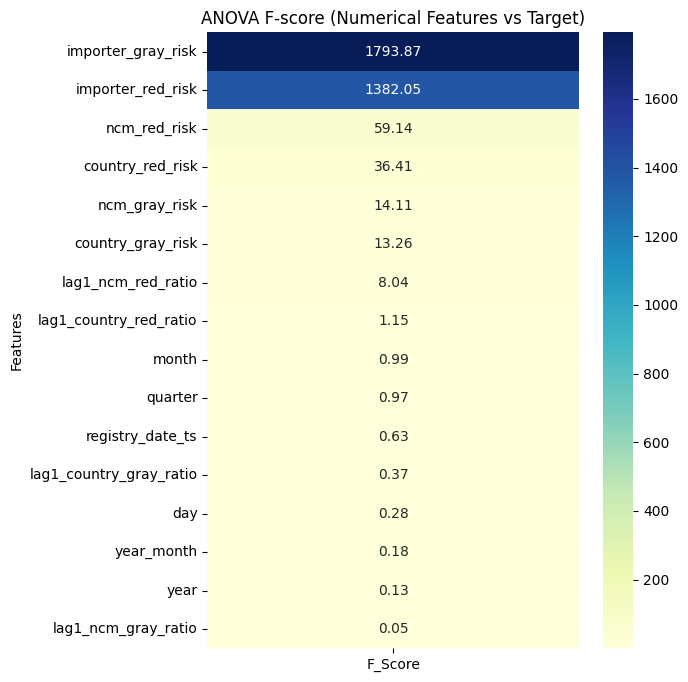

                    Feature      F_Score       p_value
0        importer_gray_risk  1793.871820  0.000000e+00
1         importer_red_risk  1382.051820  0.000000e+00
2              ncm_red_risk    59.141802  3.429226e-38
3          country_red_risk    36.407984  1.659785e-23
4             ncm_gray_risk    14.113093  3.413720e-09
5         country_gray_risk    13.258838  1.192782e-08
6        lag1_ncm_red_ratio     8.042495  2.352645e-05
7    lag1_country_red_ratio     1.153592  3.258906e-01
8                     month     0.989535  3.964954e-01
9                   quarter     0.969601  4.059052e-01
10         registry_date_ts     0.634164  5.928915e-01
11  lag1_country_gray_ratio     0.370300  7.744437e-01
12                      day     0.283130  8.376209e-01
13               year_month     0.176895  9.120996e-01
14                     year     0.131198  9.415622e-01
15      lag1_ncm_gray_ratio     0.049433  9.854691e-01


In [51]:
# Isolate numerical features names
numerical_cols = df.select_dtypes(include=['int32','int64','float64']).columns.tolist()

# Define target column and encode
target = 'channel'
le = LabelEncoder()
y = le.fit_transform(df[target].astype(str))

# Extract numerical data
X_num = df[numerical_cols]

# Compute ANOVA F-scores and p-values
f_scores, p_values = f_classif(X_num, y)

# Create DataFrame with F-scores
anova_df = pd.DataFrame({
    'Feature': numerical_cols,
    'F_Score': f_scores,
    'p_value': p_values
}).sort_values(by='F_Score', ascending=False).reset_index(drop=True)

# Plot vertical heatmap of F-scores
plt.figure(figsize=(6, len(anova_df) * 0.5))
sns.heatmap(
    anova_df.set_index('Feature')[['F_Score']],  # only F-score for heatmap
    annot=True, cmap='YlGnBu', fmt='.2f',
    cbar=True
)
plt.title('ANOVA F-score (Numerical Features vs Target)')
plt.ylabel('Features')
plt.savefig("visualizations/ANOVA_F-score_(Numerical_Features_vs_Target).png", dpi=300, bbox_inches='tight')
plt.show()

# Print ranked ANOVA results
print(anova_df)


#### Categorical features vs target variable

Metric: Cramer's V

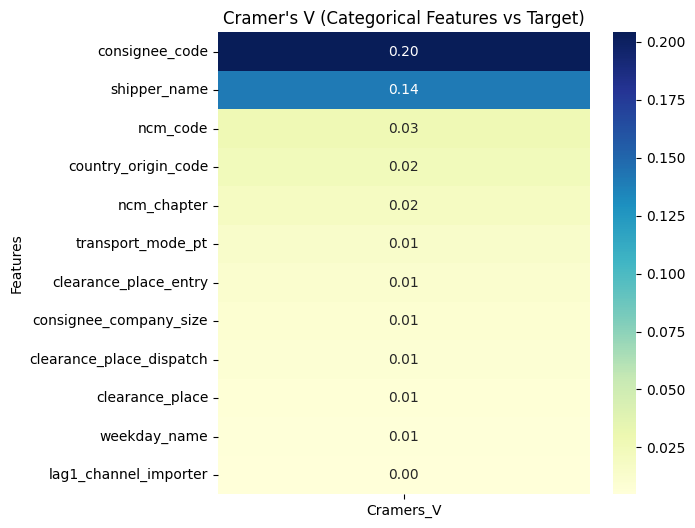

                     Feature  Cramers_V
0             consignee_code   0.204128
1               shipper_name   0.140930
2                   ncm_code   0.028010
3        country_origin_code   0.023484
4                ncm_chapter   0.019544
5          transport_mode_pt   0.014400
6      clearance_place_entry   0.011921
7     consignee_company_size   0.010103
8   clearance_place_dispatch   0.009044
9            clearance_place   0.007011
10              weekday_name   0.006152
11     lag1_channel_importer   0.004766


In [52]:

# Isolate categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('document_number')
target = 'channel'

# Remove target from feature list if present
categorical_cols = [col for col in categorical_cols if col != target]

# Define a function to compute Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Compute Cramer's V for each categorical feature vs target
cramers_v_scores = {}
for col in categorical_cols:
    cramers_v_scores[col] = cramers_v(df[col], df[target])

# Create DataFrame and sort by Cramer's V
cramer_df = pd.DataFrame({
    'Feature': list(cramers_v_scores.keys()),
    'Cramers_V': list(cramers_v_scores.values())
}).sort_values(by='Cramers_V', ascending=False).reset_index(drop=True)

# Plot vertical heatmap
plt.figure(figsize=(6, len(cramer_df)*0.5))
sns.heatmap(
    cramer_df.set_index('Feature'),
    annot=True, cmap='YlGnBu', fmt='.2f',
    cbar=True
)
plt.title("Cramer's V (Categorical Features vs Target)")
plt.ylabel("Features")
plt.savefig("visualizations/Cramers_V_(Categorical_Features_vs_Target).png", dpi=300, bbox_inches='tight')
plt.show()

# Print ranked scores
print(cramer_df)


**Comment:** In a real-world scenario, I would typically analyze the correlation between all features to check for multicollinearity. However, since that calculation and analysis is complex and time-consuming for many features of different data types, I will skip this step due to time constraints.

### Target Variable Analysis

#### Target variable class distribution

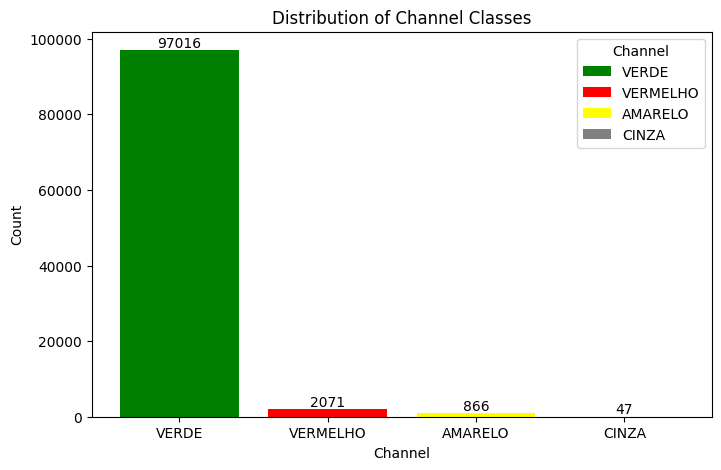

In [53]:
# Count occurrences per channel
channel_counts = df['channel'].value_counts()

# Create bar plot
plt.figure(figsize=(8,5))
bars = plt.bar(channel_counts.index, channel_counts.values, color=['green', 'red', 'yellow', 'gray'], label=channel_counts.index)

plt.title('Distribution of Channel Classes')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Add legend
plt.legend(title='Channel')
plt.savefig("visualizations/Distribution_of_Channel_Classes.png", dpi=300, bbox_inches='tight')
plt.show()



#### Risk classes vs High correlation features

Below are examples of data analysis plots showing the top 5 occurrences of selected features by channel. I chose features that have a high correlation with the target variable: consignee_code, shipper_name, and ncm_code. For example, the first plot displays the top 5 consignee codes with the highest number of occurrences in the red channel. These plots are useful for quickly identifying the most frequent entities within each channel, highlighting potential high-risk patterns or unusual activity that may warrant closer monitoring.

Note: Previously, in data pre-processing steps, I removed the consignee names. Additionally, we don’t have definitions for each NCM code. However, in a real data analysis context, it would be necessary to retrieve these consignee names and NCM definitions to identify importers and product types that are typically associated with higher risk.

##### Red channel

In [54]:
# Filter rows where channel is red
red_channel_df = df[df['channel'] == 'VERMELHO']

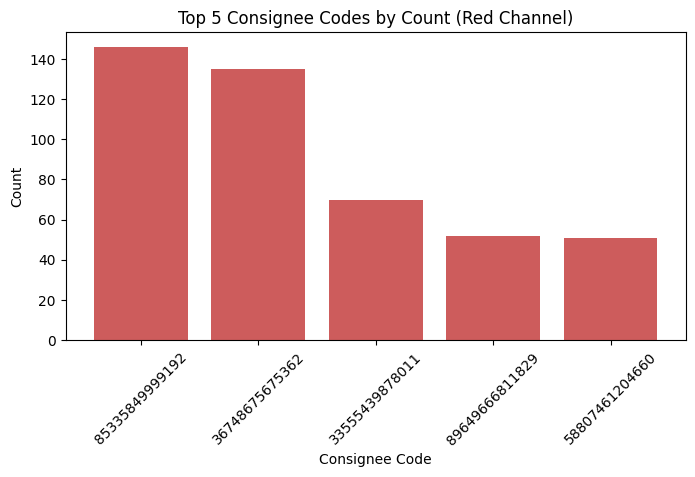

In [55]:
# Plot consignee_code for red channel

# Count occurrences of each consignee_code and get top 5
top5_counts = red_channel_df['consignee_code'].value_counts().head(5)

# Create bar plot
plt.figure(figsize=(8,4))
bars = plt.bar(top5_counts.index, top5_counts.values, color='indianred')
plt.title('Top 5 Consignee Codes by Count (Red Channel)')
plt.xlabel('Consignee Code')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate labels if needed
plt.savefig("visualizations/Top_5_Consignee_Codes_by_Count_(Red_Channel).png", dpi=300, bbox_inches='tight')
plt.show()



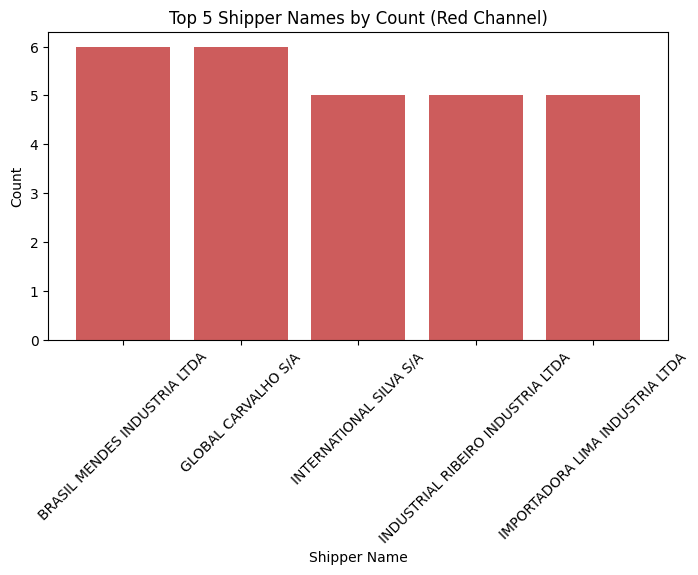

In [56]:
# Plot shipper_name for red channel

# Count occurrences of each shipper_name and get top 5
top5_counts = red_channel_df['shipper_name'].value_counts().head(5)

# Create bar plot
plt.figure(figsize=(8,4))
bars = plt.bar(top5_counts.index, top5_counts.values, color='indianred')
plt.title('Top 5 Shipper Names by Count (Red Channel)')
plt.xlabel('Shipper Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate labels if needed
plt.savefig("visualizations/Top_5_Shipper_Names_by_Count_(Red_Channel).png", dpi=300, bbox_inches='tight')
plt.show()

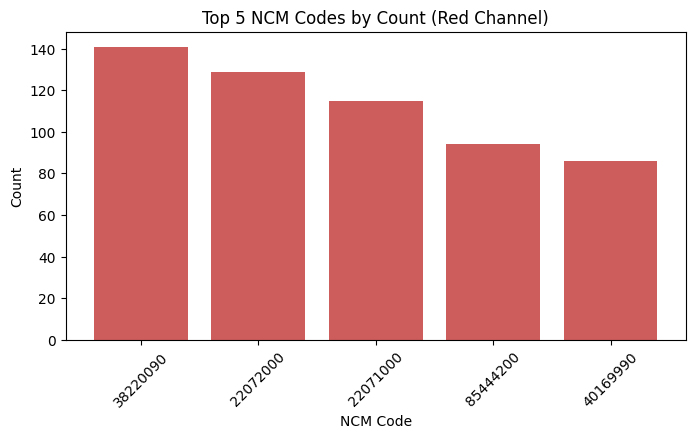

In [57]:
# Plot ncm_code for red channel

# Count occurrences of each ncm_code and get top 5
top5_counts = red_channel_df['ncm_code'].value_counts().head(5)

# Create bar plot
plt.figure(figsize=(8,4))
bars = plt.bar(top5_counts.index, top5_counts.values, color='indianred')
plt.title('Top 5 NCM Codes by Count (Red Channel)')
plt.xlabel('NCM Code')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate labels if needed
plt.savefig("visualizations/Top_5_NCM_Codes_by_Count_(Red_Channel).png", dpi=300, bbox_inches='tight')
plt.show()

##### Gray channel

In [58]:
# Filter rows where channel is gray
gray_channel_df = df[df['channel'] == 'CINZA']

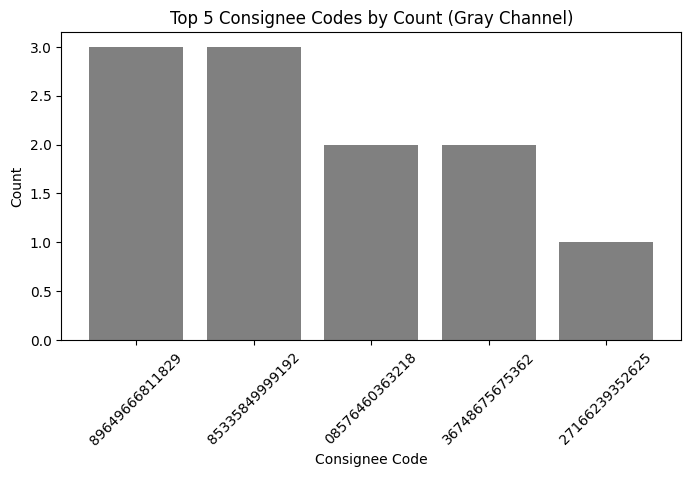

In [59]:
# Plot consignee_code for gray channel

# Count occurrences of each consignee_code and get top 5
top5_counts = gray_channel_df['consignee_code'].value_counts().head(5)

# Create bar plot
plt.figure(figsize=(8,4))
bars = plt.bar(top5_counts.index, top5_counts.values, color='gray')
plt.title('Top 5 Consignee Codes by Count (Gray Channel)')
plt.xlabel('Consignee Code')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate labels if needed
plt.savefig("visualizations/Top_5_Consignee_Codes_by_Count_(Gray_Channel).png", dpi=300, bbox_inches='tight')
plt.show()



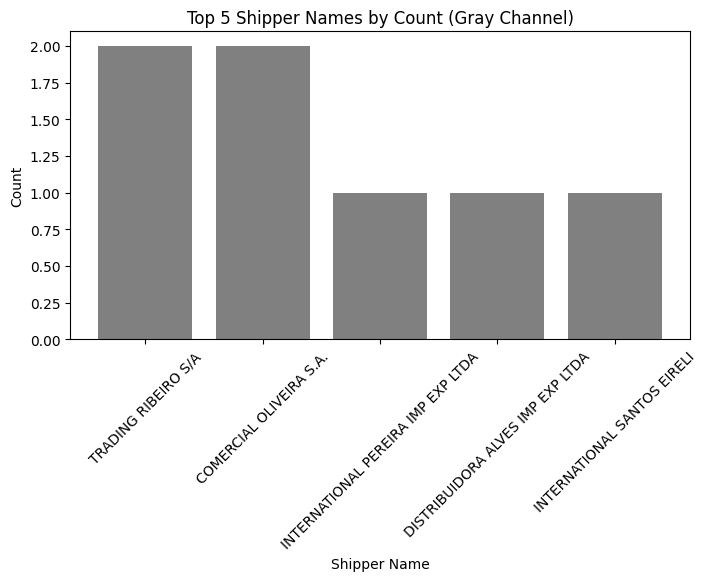

In [60]:
# Plot shipper_name for gray channel

# Count occurrences of each shipper_name and get top 5
top5_counts = gray_channel_df['shipper_name'].value_counts().head(5)

# Create bar plot
plt.figure(figsize=(8,4))
bars = plt.bar(top5_counts.index, top5_counts.values, color='gray')
plt.title('Top 5 Shipper Names by Count (Gray Channel)')
plt.xlabel('Shipper Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate labels if needed
plt.savefig("visualizations/Top_5_Shipper_Names_by_Count_(Gray_Channel).png", dpi=300, bbox_inches='tight')
plt.show()

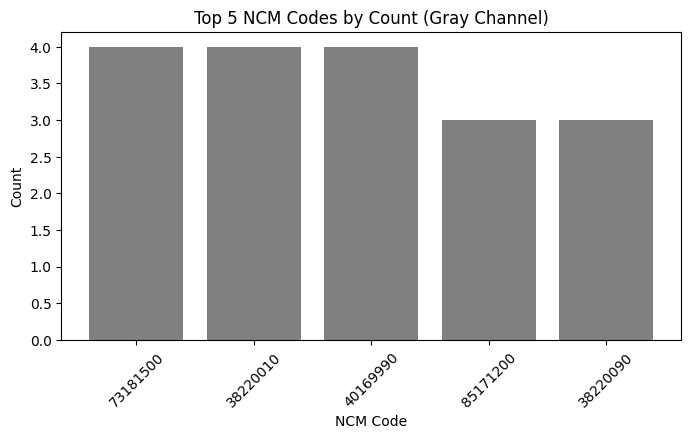

In [61]:
# Plot ncm_code for gray channel

# Count occurrences of each ncm_code and get top 5
top5_counts = gray_channel_df['ncm_code'].value_counts().head(5)

# Create bar plot
plt.figure(figsize=(8,4))
bars = plt.bar(top5_counts.index, top5_counts.values, color='gray')
plt.title('Top 5 NCM Codes by Count (Gray Channel)')
plt.xlabel('NCM Code')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate labels if needed
plt.savefig("visualizations/Top_5_NCM_Codes_by_Count_(Gray_Channel).png", dpi=300, bbox_inches='tight')
plt.show()

#### Impact of tranport mode on channel

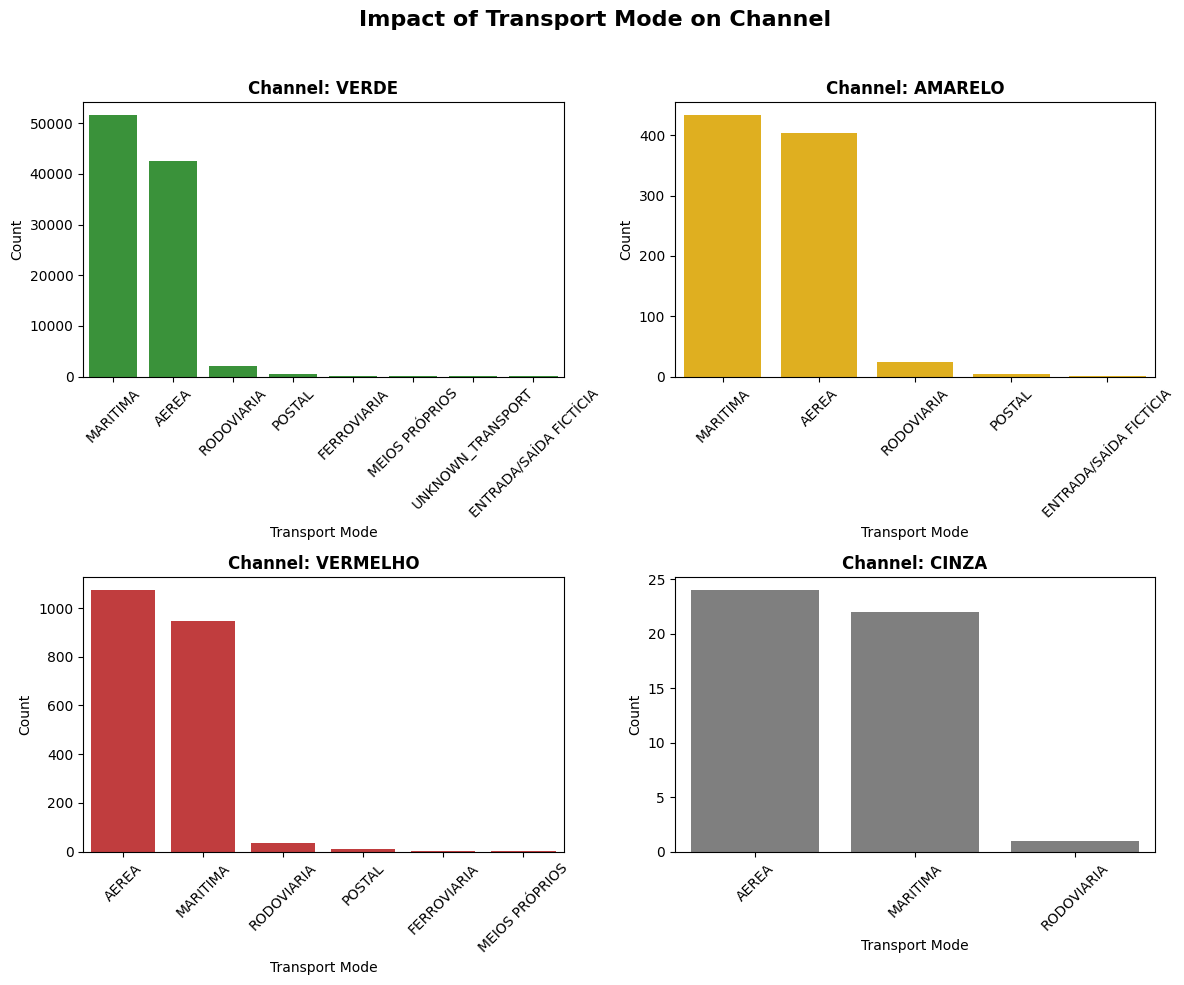

In [62]:
# Define a single solid color for each channel
channel_colors = {
    'VERDE': '#2ca02c',     # green
    'AMARELO': '#ffbf00',   # yellow/orange
    'VERMELHO': '#d62728',  # red
    'CINZA': '#7f7f7f'      # gray
}

# Get unique channels
channels = df['channel'].dropna().unique()

# Create grid for 4 plots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each channel
for i, ch in enumerate(channels):
    ax = axes[i]
    subset = df[df['channel'] == ch]
    
    # Get the color for this channel
    color = channel_colors.get(ch) 
    
    sns.countplot(
        data=subset,
        x='transport_mode_pt',
        order=subset['transport_mode_pt'].value_counts().index,
        ax=ax,
        color=color
    )
    
    ax.set_title(f"Channel: {ch}", fontsize=12, fontweight='bold')
    ax.set_xlabel('Transport Mode')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots (in case <4)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title for the entire grid
fig.suptitle("Impact of Transport Mode on Channel", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("visualizations/Impact_of_transport_mode_on_channel.png", dpi=300, bbox_inches='tight')
plt.show()


**Analysis:** when comparing transport modes, shipments transported by air show a slightly higher tendency to be classified into higher-risk categories compared to those transported by sea.

#### Impact of Consignee Company Size on Channel

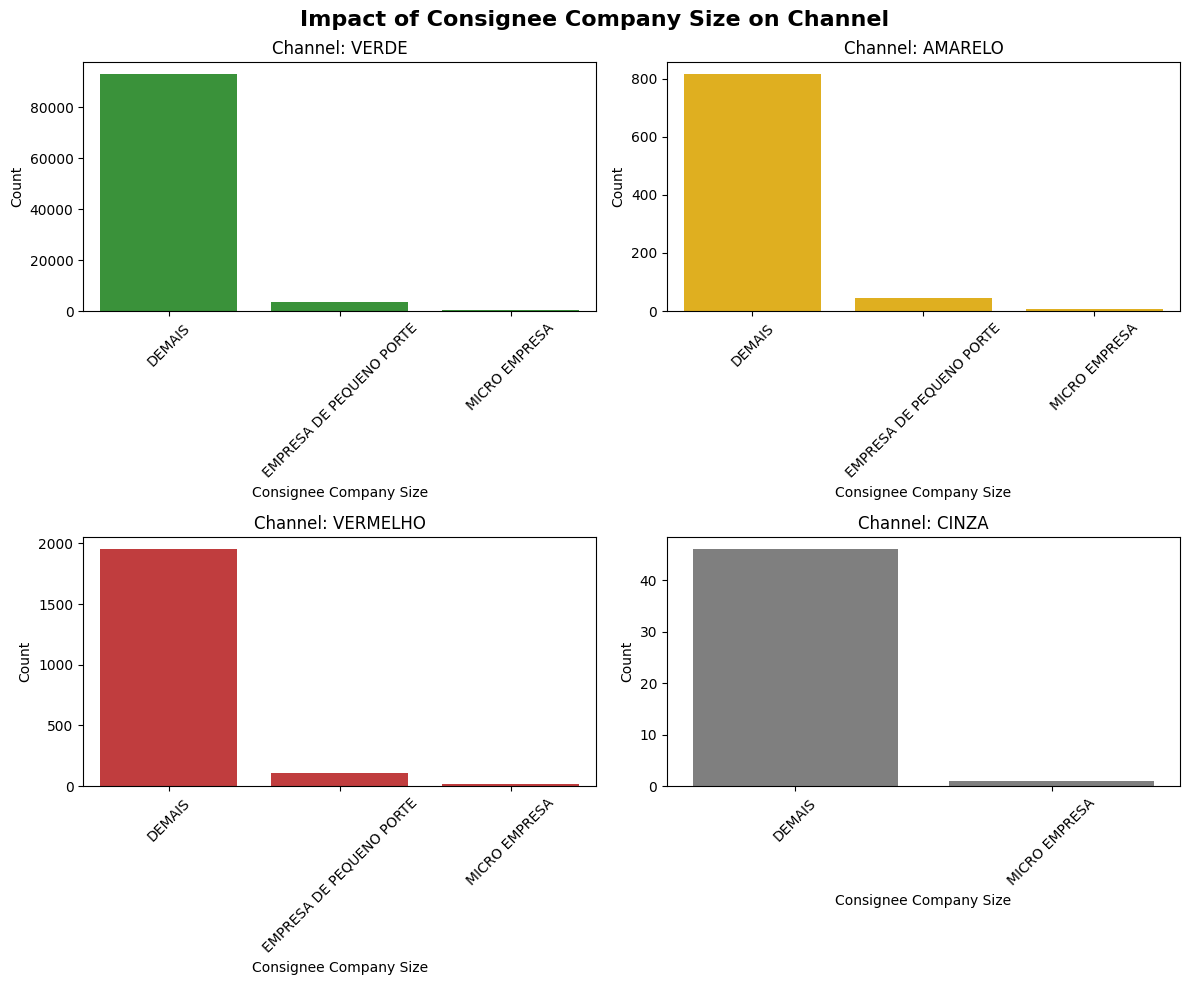

In [63]:
# Get unique channels
channels = df['channel'].dropna().unique()

# Create grid for 4 plots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each channel
for i, ch in enumerate(channels):
    ax = axes[i]
    subset = df[df['channel'] == ch]

    # Get the color for this channel
    color = channel_colors.get(ch) 
    
    sns.countplot(
        data=subset,
        x='consignee_company_size',
        order=subset['consignee_company_size'].value_counts().index,
        ax=ax,
        color=color
    )
    
    ax.set_title(f"Channel: {ch}")
    ax.set_xlabel('Consignee Company Size')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots (in case <4)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title for the entire grid
fig.suptitle("Impact of Consignee Company Size on Channel", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig("visualizations/Impact_of_Consignee_Company_Size_on_Channel.png", dpi=300, bbox_inches='tight')
plt.show()

**Analysis:** from the plots above, it cannot be inferred that the consignee company size has a significant impact on the selected channel. This aligns with the low correlation observed between this feature and the channel in the correlation heatmap.

#### Time-Series Analysis of Channel Distribution

A time-series analysis of channel distribution is important because it allows us to track how the number of shipments in each risk channel changes over time. This is relevant in the channel risk context as it can reveal emerging trends, seasonal patterns, or sudden spikes in high-risk channels, enabling proactive risk monitoring and better decision-making.

Note: the quantity of green channels is much bigger than the other channels which makes it difficult to visualize the trends of the other channels porperly. Therefore, to plot the time-series of the channels, I separeted it into two plots. The first one is to analyze the green channel and the second one to analyze the other channels.

##### By year

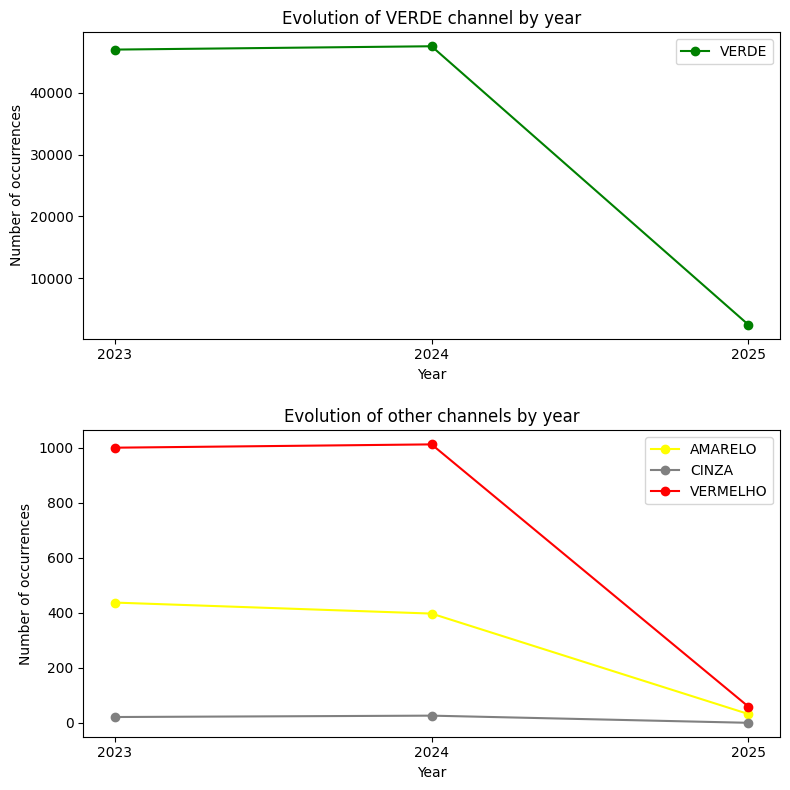

In [64]:
# Count how many times each channel appears per year
df_counts = df.groupby(['year','channel']).size().reset_index(name='count')

# Pivot to have channels as columns
df_pivot = df_counts.pivot(index='year', columns='channel', values='count').fillna(0)

# Define colors for each channel
channel_colors = {
    'VERDE': 'green',
    'AMARELO': 'yellow',
    'CINZA': 'gray',
    'VERMELHO': 'red'
}

# --- Create subplots (2 rows, 1 column) ---
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# --- Plot 1: VERDE ---
if 'VERDE' in df_pivot.columns:
    axes[0].plot(df_pivot.index, df_pivot['VERDE'], marker='o', color='green', label='VERDE')
    axes[0].set_title('Evolution of VERDE channel by year')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number of occurrences')
    axes[0].set_xticks(df_pivot.index)
    axes[0].legend(loc='upper right')
    axes[0].grid(False)

# --- Plot 2: Other channels ---
other_channels = [c for c in df_pivot.columns if c != 'VERDE']
for channel in other_channels:
    axes[1].plot(df_pivot.index, df_pivot[channel], marker='o',
                 label=channel, color=channel_colors.get(channel, 'black'))

axes[1].set_title('Evolution of other channels by year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of occurrences')
axes[1].set_xticks(df_pivot.index)
axes[1].legend(loc='upper right')
axes[1].grid(False)

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('visualizations/Evolution_of_channels_by_year.png', dpi=300)
plt.show()


**Analysis:** Channels behave similarly. They stay constant from 2023 to 2024 and naturally they drop in 2025, which is the current year.

##### By month

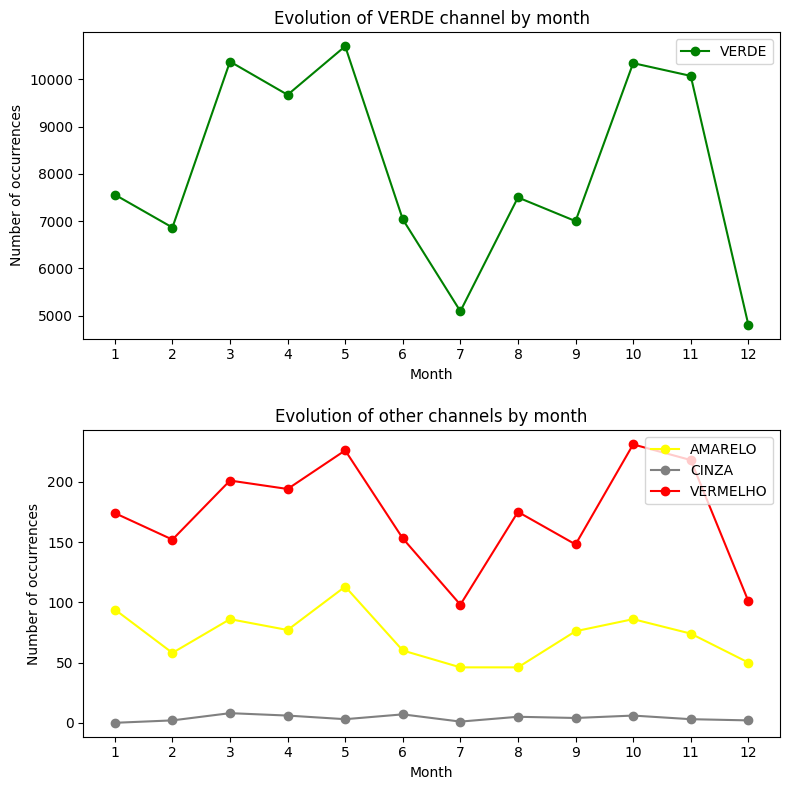

In [65]:
# Count how many times each channel appears per month
df_counts = df.groupby(['month','channel']).size().reset_index(name='count')

# Pivot to have channels as columns
df_pivot = df_counts.pivot(index='month', columns='channel', values='count').fillna(0)

# Define colors for each channel
channel_colors = {
    'VERDE': 'green',
    'AMARELO': 'yellow',
    'CINZA': 'gray',
    'VERMELHO': 'red'
}

# --- Create subplots (2 rows, 1 column) ---
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# --- Plot 1: VERDE ---
if 'VERDE' in df_pivot.columns:
    axes[0].plot(df_pivot.index, df_pivot['VERDE'], marker='o', color='green', label='VERDE')
    axes[0].set_title('Evolution of VERDE channel by month')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Number of occurrences')
    axes[0].set_xticks(df_pivot.index)
    axes[0].tick_params(labelbottom=True)
    axes[0].legend(loc='upper right')
    axes[0].grid(False)

# --- Plot 2: Other channels ---
other_channels = [c for c in df_pivot.columns if c != 'VERDE']
for channel in other_channels:
    axes[1].plot(df_pivot.index, df_pivot[channel], marker='o',
                 label=channel, color=channel_colors.get(channel, 'black'))

axes[1].set_title('Evolution of other channels by month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of occurrences')
axes[1].set_xticks(df_pivot.index)
axes[1].legend(loc='upper right')
axes[1].grid(False)

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('visualizations/Evolution_of_channels_by_month.png', dpi=300)
plt.show()

**Analysis:** Channels behave similarly. The peaks are in May and October and the low is in July

##### By weekday

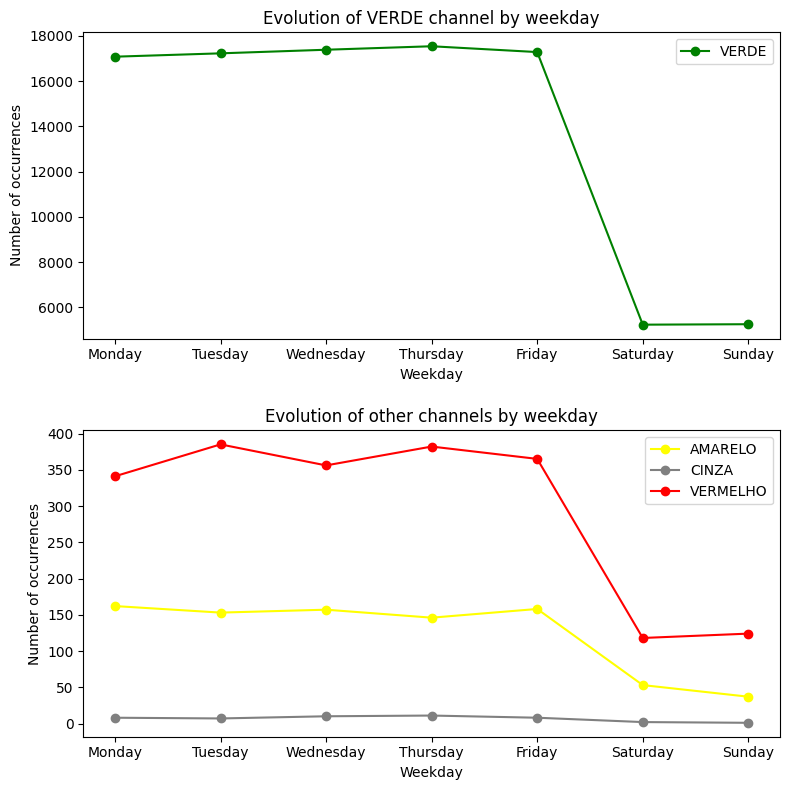

In [66]:
# Count how many times each channel appears per weekday
df_counts = df.groupby(['weekday_name','channel']).size().reset_index(name='count')

# Pivot to have channels as columns
df_pivot = df_counts.pivot(index='weekday_name', columns='channel', values='count').fillna(0)

# --- Optional: Order weekdays properly ---
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_pivot = df_pivot.reindex(weekday_order)

# Define colors for each channel
channel_colors = {
    'VERDE': 'green',
    'AMARELO': 'yellow',
    'CINZA': 'gray',
    'VERMELHO': 'red'
}

# --- Create subplots (2 rows, 1 column) ---
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# --- Plot 1: VERDE ---
if 'VERDE' in df_pivot.columns:
    axes[0].plot(df_pivot.index, df_pivot['VERDE'], marker='o', color='green', label='VERDE')
    axes[0].set_title('Evolution of VERDE channel by weekday')
    axes[0].set_xlabel('Weekday')
    axes[0].set_ylabel('Number of occurrences')
    axes[0].set_xticks(df_pivot.index)
    axes[0].tick_params(labelbottom=True)
    axes[0].legend(loc='upper right')
    axes[0].grid(False)

# --- Plot 2: Other channels ---
other_channels = [c for c in df_pivot.columns if c != 'VERDE']
for channel in other_channels:
    axes[1].plot(df_pivot.index, df_pivot[channel], marker='o',
                 label=channel, color=channel_colors.get(channel, 'black'))

axes[1].set_title('Evolution of other channels by weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Number of occurrences')
axes[1].legend(loc='upper right')
axes[1].grid(False)

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('visualizations/Evolution_of_channels_by_weekday.png', dpi=300)
plt.show()


**Analysis:** Channels behave similarly. Naturally, Saturday and Sunday have less occurrences than weekdays.

##### By quarter

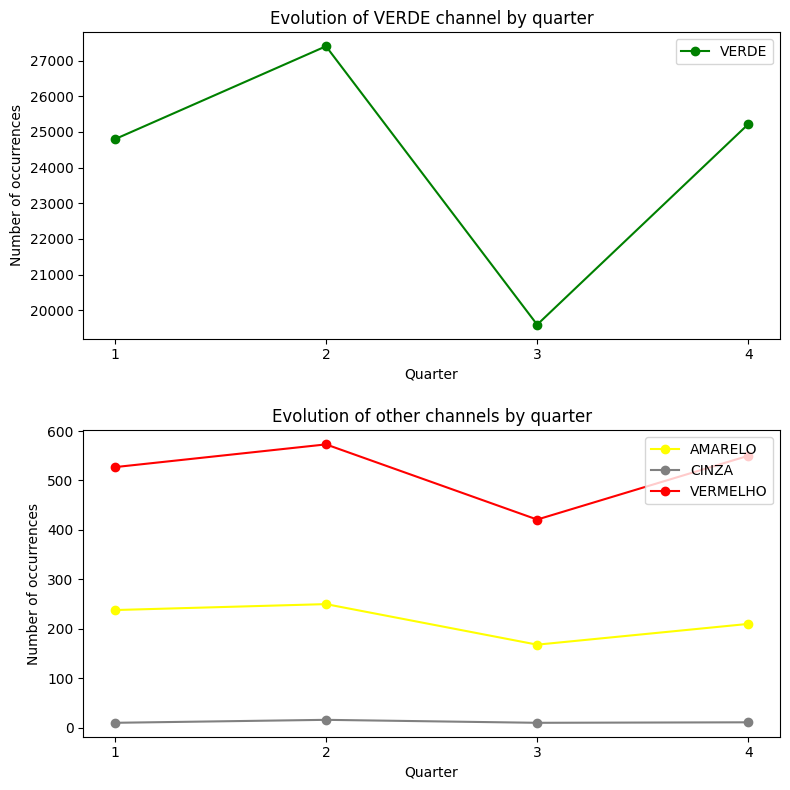

In [67]:
# Count how many times each channel appears per quarter
df_counts = df.groupby(['quarter', 'channel']).size().reset_index(name='count')

# Pivot to have channels as columns
df_pivot = df_counts.pivot(index='quarter', columns='channel', values='count').fillna(0)

# Sort quarters properly if needed
df_pivot = df_pivot.sort_index()

# Define colors for each channel
channel_colors = {
    'VERDE': 'green',
    'AMARELO': 'yellow',
    'CINZA': 'gray',
    'VERMELHO': 'red'
}

# --- Create subplots (2 rows, 1 column) ---
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# --- Plot 1: VERDE ---
if 'VERDE' in df_pivot.columns:
    axes[0].plot(df_pivot.index, df_pivot['VERDE'], marker='o', color='green', label='VERDE')
    axes[0].set_title('Evolution of VERDE channel by quarter')
    axes[0].set_xlabel('Quarter')
    axes[0].set_ylabel('Number of occurrences')
    axes[0].set_xticks(df_pivot.index)
    axes[0].tick_params(labelbottom=True)
    axes[0].legend(loc='upper right')
    axes[0].grid(False)

# --- Plot 2: Other channels ---
other_channels = [c for c in df_pivot.columns if c != 'VERDE']
for channel in other_channels:
    axes[1].plot(df_pivot.index, df_pivot[channel], marker='o',
                 label=channel, color=channel_colors.get(channel, 'black'))

axes[1].set_title('Evolution of other channels by quarter')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Number of occurrences')
axes[1].set_xticks(df_pivot.index)
axes[1].legend(loc='upper right')
axes[1].grid(False)

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('visualizations/Evolution_of_channels_by_quarter.png', dpi=300)
plt.show()


**Analysis:** Channels behave similarly. They slightly increase in the second quarter, then they drop in the third quarter and increase again in the fourth quarter.

In [68]:
# Export the final cleaned and preprocessed DataFrame to use in the customs_channel_model_training notebook
df.to_csv('data/data_for_model.csv', sep=';', index=False)